<a href="https://colab.research.google.com/github/giannisgian/Teliki-ergasia/blob/main/UkRuEmbassyTwitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install Twython
import pandas as pd
import numpy as np 
from twython import Twython
from twython import TwythonError
import requests
from datetime import datetime
import ast
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
plt.style.use('ggplot')

CONSUMER_KEY = "DyoTjohC4arsxLFBjmh71l5Fi"
CONSUMER_SECRET = "sWE3WV27dOOsZnRpSo19bZCojZykVqftYh1uAQvCwqviro4jT1"
OAUTH_TOKEN = "1133494860554604545-aQrvZDpNyxgi6MwQbHegX8Bkx6CUfI"
OAUTH_TOKEN_SECRET = "inqueIKTVIqqKGXKiHS7dOwNvSmCQdWgYN83ih1kQkNkS"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
!python -m spacy download el_core_news_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.6 MB 1.8 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Rus Embassy Greece

https://twitter.com/RFEmbassyGr

In [ ]:
Rus = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='RFEmbassyGr',count=200, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    # Add whatever you want from the tweet, here we just add the text
    Rus.append(tweet)

I Got: 200  tweets


In [ ]:
pd.DataFrame(Rus)

created_at                   id               id_str  \
0    Tue Jul 05 17:10:42 +0000 2022  1544368183880073218  1544368183880073218   
1    Tue Jul 05 12:00:05 +0000 2022  1544290015345364992  1544290015345364992   
2    Mon Jul 04 11:52:22 +0000 2022  1543925684912984067  1543925684912984067   
3    Sun Jul 03 18:30:22 +0000 2022  1543663457228177414  1543663457228177414   
4    Sun Jul 03 10:40:13 +0000 2022  1543545138877718532  1543545138877718532   
..                              ...                  ...                  ...   
195  Fri Apr 29 19:39:30 +0000 2022  1520125641923907584  1520125641923907584   
196  Fri Apr 29 18:12:53 +0000 2022  1520103845606658050  1520103845606658050   
197  Fri Apr 29 05:05:02 +0000 2022  1519905577106874369  1519905577106874369   
198  Thu Apr 28 10:02:20 +0000 2022  1519618006715756544  1519618006715756544   
199  Thu Apr 28 09:46:13 +0000 2022  1519613949712416769  1519613949712416769   

                                             full_text  truncated  \
0    🔥 Пожарная служба Греции сообщает об ухудшении...      False   
1    🎨 #Σανσήμερα το 1832 γεννήθηκε ο Ρώσος ζωγράφο...      False   
2    🇷🇺 Σ.#Λαβρόβ:\n\nΗ άρνηση οποιωνδήποτε επαφών ...      False   
3    💬 Σεργκέι #Λαβρόβ:\n\n#Ρωσία #Δύση #Ευρώπη #Σι...      False   
4    🎨 Στις 2 Ιουλίου του 1839 γεννήθηκε ο #Ρώσος ζ...      False   
..                                                 ...        ...   
195  🩰Σήμερα είναι η Παγκόσμια Ημέρα του Χορού. Αυτ...      False   
196  ❄️Στις 27 Απριλίου εορτάζεται η Ημέρα της Δημο...      False   
197  RT @mfa_russia: #Opinion by Russian MFA Spokes...      False   
198  Στις 26 Απριλίου του 1164 στην πόλη Βλαντίμιρ ...      False   
199  RT @mfa_russia: ⭐️ On April 28, 1945, a milita...      False   

    display_text_range                                           entities  \
0             [0, 273]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1             [0, 274]  {'hashtags': [{'text': 'Σανσήμερα', 'indices':...   
2             [0, 271]  {'hashtags': [{'text': 'Λαβρόβ', 'indices': [5...   
3              [0, 61]  {'hashtags': [{'text': 'Λαβρόβ', 'indices': [1...   
4             [0, 262]  {'hashtags': [{'text': 'Ρώσος', 'indices': [38...   
..                 ...                                                ...   
195           [0, 246]  {'hashtags': [], 'symbols': [], 'user_mentions...   
196           [0, 225]  {'hashtags': [], 'symbols': [], 'user_mentions...   
197           [0, 140]  {'hashtags': [{'text': 'Opinion', 'indices': [...   
198           [0, 276]  {'hashtags': [], 'symbols': [], 'user_mentions...   
199           [0, 140]  {'hashtags': [{'text': 'OTD', 'indices': [90, ...   

                                     extended_entities  \
0    {'media': [{'id': 1544368178968641537, 'id_str...   
1    {'media': [{'id': 1544290004293361667, 'id_str...   
2    {'media': [{'id': 1543925679657570304, 'id_str...   
3    {'media': [{'id': 1543663451477876736, 'id_str...   
4    {'media': [{'id': 1543545126101868544, 'id_str...   
..                                                 ...   
195  {'media': [{'id': 1520125587003744256, 'id_str...   
196  {'media': [{'id': 1520103841039069187, 'id_str...   
197                                                NaN   
198  {'media': [{'id': 1519617995903021056, 'id_str...   
199                                                NaN   

                                                source  in_reply_to_status_id  \
0    <a href="http://twitter.com/download/iphone" r...                    NaN   
1    <a href="http://twitter.com/download/iphone" r...                    NaN   
2    <a href="http://twitter.com/download/iphone" r...                    NaN   
3    <a href="http://twitter.com/download/iphone" r...                    NaN   
4    <a href="http://twitter.com/download/iphone" r...                    NaN   
..                                                 ...                    ...   
195  <a href="https://mobile.twitt

In [ ]:
# Count could be less than 200, see:
# https://dev.twitter.com/discussions/7513
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='RFEmbassyGr',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        Rus.append(tweet)
# Number of tweets the user has made
print("I got :", len(Rus), " in total!!!")

I Got: 100  tweets more... Last ID: 1504790578302758947
I Got: 100  tweets more... Last ID: 1498213778378399744
I Got: 100  tweets more... Last ID: 1491728734155595779
I Got: 100  tweets more... Last ID: 1481551599952609280
I Got: 100  tweets more... Last ID: 1468708107790557183
I Got: 100  tweets more... Last ID: 1459183758070976533
I Got: 100  tweets more... Last ID: 1448337122310725636
I Got: 100  tweets more... Last ID: 1438565251797209097
I Got: 100  tweets more... Last ID: 1430161804211236865
I Got: 100  tweets more... Last ID: 1421045178593431552
I Got: 100  tweets more... Last ID: 1412004396699992064
I Got: 100  tweets more... Last ID: 1403743899768795136
I Got: 100  tweets more... Last ID: 1393948694970576896
I Got: 100  tweets more... Last ID: 1384170843756892160
I Got: 100  tweets more... Last ID: 1373932354033569793
I Got: 99  tweets more... Last ID: 1360596394898300930
I Got: 99  tweets more... Last ID: 1351440344970309631
I Got: 100  tweets more... Last ID: 13377576143698

In [ ]:
# Number of tweets the user has made
print("I got :", len(Rus), " in total!!!")
#len(Rus)

I got : 3248  in total!!!


In [ ]:
for tweet in Rus:
    print(tweet['created_at'],tweet['full_text'])

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
#RussiaGreece #Moscow https://t.co/017KGv4svq
Mon Sep 27 20:13:42 +0000 2021 💉Το Υπουργείο Υγείας της Ρωσίας έδωσε την έγκρισή του για την έναρξη κλινικών δοκιμών του Betuvax, του νέου συνδυαστικού εμβολίου κατά του κορονοϊού.
Το Betuvax-CoV-2 είναι ένα συνδυαστικό εμβόλιο για την πρόληψη της μόλυνσης από κορονοϊό. 

🔗 https://t.co/vEzsecbCNq https://t.co/GCy5XPcSLq
Mon Sep 27 12:00:19 +0000 2021 Στις 27 Σεπτέμβρη/9 Οκτώβρη, 190 χρόνια πριν, δολοφονήθηκε ο Ιωάννης Καποδίστριας, ΥΠΕΞ της Ρωσίας και πρώτος Κυβερνήτης της Ελλάδας. 

📺 Οι φοιτητές του @mgimo της Μόσχας, μελλοντικοί διπλωμάτες τιμούν στα ελληνικά τη μνήμη του και την Ελληνική Επανάσταση https://t.co/2xgO9UZi8H
Mon Sep 27 10:54:44 +0000 2021 ⚓ Στις 27 Σεπτεμβρίου 1783, κατασκευάστηκε το πρώτο πλοίο του ρωσικού Στόλου της Μαύρης Θάλασσας.
Αυτός ο στόλος διακρίθηκε στους ρώσο-τουρκικούς πολέμους, στην πολιορκία της Κέρκυρας (1798-1799), στον Κριμαϊκό Πόλεμο και στους δύο π

In [ ]:
#Rus[0]

In [ ]:
Rus_df = pd.DataFrame(Rus)
#Rus_df

In [ ]:
Rus_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/Rus.tsv", sep='\t')

# Ukr Embassy Greece

https://twitter.com/ukringrc

In [ ]:
Ukr = []
try:
    user_timeline = twitter.get_user_timeline(screen_name='UKRinGRC',count=200, tweet_mode = 'extended'  )
except TwythonError as e:
    print("Error getting tweets:", e)
print("I Got:", len(user_timeline), " tweets")
for tweet in user_timeline:
    # Add whatever you want from the tweet, here we just add the text
    Ukr.append(tweet)

I Got: 200  tweets


In [ ]:
pd.DataFrame(Ukr)

created_at                   id               id_str  \
0    Tue Jul 05 18:51:17 +0000 2022  1544393496920035328  1544393496920035328   
1    Tue Jul 05 08:31:34 +0000 2022  1544237540571480065  1544237540571480065   
2    Tue Jul 05 08:31:32 +0000 2022  1544237530530324481  1544237530530324481   
3    Tue Jul 05 08:31:30 +0000 2022  1544237520640249858  1544237520640249858   
4    Tue Jul 05 08:30:54 +0000 2022  1544237372941926401  1544237372941926401   
..                              ...                  ...                  ...   
195  Tue Jun 07 14:16:00 +0000 2022  1534177357166157830  1534177357166157830   
196  Tue Jun 07 14:15:54 +0000 2022  1534177332700889100  1534177332700889100   
197  Tue Jun 07 14:15:50 +0000 2022  1534177318050095105  1534177318050095105   
198  Fri Jun 03 14:42:27 +0000 2022  1532734461204471809  1532734461204471809   
199  Fri Jun 03 14:42:23 +0000 2022  1532734446323081216  1532734446323081216   

                                             full_text  truncated  \
0    Speech by the President of Ukraine @ZelenskyyU...      False   
1    RT @Sergii_Shutenko: Ukraine in 🔝 of internati...      False   
2    RT @DmytroKuleba: Russia’s export-oriented eco...      False   
3    RT @NikosDendias: I am visiting Lugano to repr...      False   
4    RT @DmytroKuleba: Ukraine’s First Lady Olena Z...      False   
..                                                 ...        ...   
195  RT @MFA_Ukraine: 🇺🇦 President of Ukraine @Zele...      False   
196  RT @DmytroKuleba: Ukraine is ready to create n...      False   
197  RT @MFA_Ukraine: #Russia has lost the right to...      False   
198  RT @MFA_Ukraine: 1️⃣0️⃣0️⃣ days ago #Russia st...      False   
199  RT @ZelenskyyUa: Grateful to 🇪🇺, @vonderleyen,...      False   

    display_text_range                                           entities  \
0             [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
1             [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
2             [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
3             [0, 138]  {'hashtags': [], 'symbols': [], 'user_mentions...   
4             [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
..                 ...                                                ...   
195           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
196           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   
197           [0, 140]  {'hashtags': [{'text': 'Russia', 'indices': [1...   
198           [0, 140]  {'hashtags': [{'text': 'Russia', 'indices': [3...   
199           [0, 140]  {'hashtags': [], 'symbols': [], 'user_mentions...   

                                                source in_reply_to_status_id  \
0    <a href="http://twitter.com/download/iphone" r...                  None   
1    <a href="http://twitter.com/download/iphone" r...                  None   
2    <a href="http://twitter.com/download/iphone" r...                  None   
3    <a href="http://twitter.com/download/iphone" r...                  None   
4    <a href="http://twitter.com/download/iphone" r...                  None   
..                                                 ...                   ...   
195  <a href="http://twitter.com/download/iphone" r...                  None   
196  <a href="http://twitter.com/download/iphone" r...                  None   
197  <a href="http://twitter.com/download/iphone" r...                  None   
198  <a href="http://twitter.com/download/iphone" r...                  None   
199  <a href="http://twitter.com/download/iphone" r...                  None   

    in_reply_to_status_id_str  ... favorited retweeted possibly_sensitive  \
0                        None  ...     False     False              False   
1                        None  ...     False     False                NaN   
2                        None  ...     False     False                NaN   
3                        None

In [ ]:
# Count could be less than 200, see:
# https://dev.twitter.com/discussions/7513
while len(user_timeline) != 0: 
    try:
        user_timeline = twitter.get_user_timeline(screen_name='UKRinGRC',count=100,
                                                  tweet_mode = 'extended', max_id=user_timeline[len(user_timeline)-1]['id']-1)
    except TwythonError as e:
        print("Error getting tweets:", e)
    if len(user_timeline) > 0:
        print("I Got:", len(user_timeline), " tweets more... Last ID:", user_timeline[len(user_timeline)-1]['id']-1)
    for tweet in user_timeline:
        # Add whatever you want from the tweet, here we just add the text
        Ukr.append(tweet)
# Number of tweets the user has made
print("I got :", len(Ukr), " in total!!!")

I Got: 100  tweets more... Last ID: 1527560233467498495
I Got: 100  tweets more... Last ID: 1522814203429588992
I Got: 100  tweets more... Last ID: 1517154003414519807
I Got: 100  tweets more... Last ID: 1511075810085683207
I Got: 100  tweets more... Last ID: 1504418885013065730
I Got: 100  tweets more... Last ID: 1500768718040752127
I Got: 100  tweets more... Last ID: 1498609589096488960
I Got: 100  tweets more... Last ID: 1496059367698878467
I Got: 100  tweets more... Last ID: 1458768953472339971
I Got: 100  tweets more... Last ID: 1063713642019999743
I Got: 99  tweets more... Last ID: 1012560472648843263
I Got: 99  tweets more... Last ID: 948453035361165311
I Got: 100  tweets more... Last ID: 877073382570938368
I Got: 100  tweets more... Last ID: 844257067611373568
I Got: 99  tweets more... Last ID: 827586116383547391
I Got: 100  tweets more... Last ID: 796719796410810368
I Got: 100  tweets more... Last ID: 746330895133605887
I Got: 100  tweets more... Last ID: 725674053760106495
I 

In [ ]:
# Number of tweets the user has made
print("I got :", len(Ukr), " in total!!!")
#len(Rus)

I got : 2802  in total!!!


In [ ]:
for tweet in Ukr:
    print(tweet['created_at'],tweet['full_text'])

Tue Jul 05 18:51:17 +0000 2022 Speech by the President of Ukraine @ZelenskyyUa at the opening of the 26th Annual Economist Government Roundtable

https://t.co/FfGEYXeLRp
Tue Jul 05 08:31:34 +0000 2022 RT @Sergii_Shutenko: Ukraine in 🔝 of international agenda

President @Zelenskyy opened the 26th Annual Economist Government Roundtable toge…
Tue Jul 05 08:31:32 +0000 2022 RT @DmytroKuleba: Russia’s export-oriented economy relies heavily on maritime transportation provided by foreign fleets. I urge partners: r…
Tue Jul 05 08:31:30 +0000 2022 RT @NikosDendias: I am visiting Lugano to represent @PrimeministerGR at the Conference organised by the 🇨🇭 Government for the recovery of…
Tue Jul 05 08:30:54 +0000 2022 RT @DmytroKuleba: Ukraine’s First Lady Olena Zelenska has announced the Second Summit of First Ladies and Gentlemen on July 23rd. Last year…
Tue Jul 05 08:30:36 +0000 2022 RT @MFA_Ukraine: The #Ukrainian flag is on Snake Island. #Ukraine’s state symbols will be returned to every corne

In [ ]:
#Ukr[0]

In [ ]:
Ukr_df = pd.DataFrame(Ukr)
Ukr_df

created_at                   id  \
0     Tue Jul 05 18:51:17 +0000 2022  1544393496920035328   
1     Tue Jul 05 08:31:34 +0000 2022  1544237540571480065   
2     Tue Jul 05 08:31:32 +0000 2022  1544237530530324481   
3     Tue Jul 05 08:31:30 +0000 2022  1544237520640249858   
4     Tue Jul 05 08:30:54 +0000 2022  1544237372941926401   
...                              ...                  ...   
2797  Wed Jun 25 06:33:52 +0000 2014   481686696921022465   
2798  Wed Jun 18 09:07:21 +0000 2014   479188608059199488   
2799  Wed Jun 18 09:06:30 +0000 2014   479188394850140161   
2800  Wed Jun 18 08:20:09 +0000 2014   479176728817172480   
2801  Thu Jun 05 08:33:42 +0000 2014   474469094541254656   

                   id_str                                          full_text  \
0     1544393496920035328  Speech by the President of Ukraine @ZelenskyyU...   
1     1544237540571480065  RT @Sergii_Shutenko: Ukraine in 🔝 of internati...   
2     1544237530530324481  RT @DmytroKuleba: Russia’s export-oriented eco...   
3     1544237520640249858  RT @NikosDendias: I am visiting Lugano to repr...   
4     1544237372941926401  RT @DmytroKuleba: Ukraine’s First Lady Olena Z...   
...                   ...                                                ...   
2797   481686696921022465  RT @PavloKlimkin: Вперше Україна була запрошен...   
2798   479188608059199488  RT @MFA_Ukraine: Сьогодні в ООН заслухають доп...   
2799   479188394850140161  RT @ADeshchytsia: Talked to FM @WilliamJHague ...   
2800   479176728817172480  RT @ADeshchytsia: Приношу соболезнования родны...   
2801   474469094541254656  RT @euronews: [HAPPENING NOW] Petro #Poroshenk...   

      truncated display_text_range  \
0         False           [0, 138]   
1         False           [0, 140]   
2         False           [0, 140]   
3         False           [0, 138]   
4         False           [0, 140]   
...         ...                ...   
2797      False           [0, 140]   
2798      False           [0, 114]   
2799      False           [0, 140]   
2800      False           [0, 139]   
2801      False           [0, 129]   

                                               entities  \
0     {'hashtags': [], 'symbols': [], 'user_mentions...   
1     {'hashtags': [], 'symbols': [], 'user_mentions...   
2     {'hashtags': [], 'symbols': [], 'user_mentions...   
3     {'hashtags': [], 'symbols': [], 'user_mentions...   
4     {'hashtags': [], 'symbols': [], 'user_mentions...   
...                                                 ...   
2797  {'hashtags': [], 'symbols': [], 'user_mentions...   
2798  {'hashtags': [], 'symbols': [], 'user_mentions...   
2799  {'hashtags': [{'text': 'Ukraine', 'indices': [...   
2800  {'hashtags': [], 'symbols': [], 'user_mentions...   
2801  {'hashtags': [{'text': 'Poroshenko', 'indices'...   

                                                 source  \
0     <a href="http://twitter.com/download/iphone" r...   
1     <a href="http://twitter.com/download/iphone" r...   
2     <a href="http://twitter.com/download/iphone" r...   
3     <a href="http://twitter.com/download/iphone" r...   
4     <a href="http://twitter.com/download/iphone" r...   
...                                                 ...   
2797  <a href="https://dev.twitter.com/docs/tfw" rel...   
2798  <a href="http://twitter.com" rel="nofollow">Tw...   
2799  <a href="http://twitter.com" rel="nofollow">Tw...   
2800  <a href="http://twitter.com" rel="nofollow">Tw...   
2801  <a href="http://twitter.com" rel="nofollow">Tw...   

      in_reply_to_status_id in_reply_to_status_id_str  ...  favorited  \
0                       NaN                      None  ...      False   
1                       NaN                      None  ...      False   
2                       NaN                      None  ...      False   
3                       NaN                      None  ...      False   
4                       NaN                      None  ...      False   
...                

In [ ]:
Ukr_df.to_csv("/content/gdrive/My Drive/Colab Notebooks/Ukr_twitter.tsv", sep='\t')

#Rus df

In [ ]:
Rus = Rus_df[['created_at','full_text' ]]
Rus = Rus.rename(columns={'created_at': 'date', 'full_text': 'text'} )
Rus

date  \
0     Tue Jul 05 17:10:42 +0000 2022   
1     Tue Jul 05 12:00:05 +0000 2022   
2     Mon Jul 04 11:52:22 +0000 2022   
3     Sun Jul 03 18:30:22 +0000 2022   
4     Sun Jul 03 10:40:13 +0000 2022   
...                              ...   
3243  Wed Nov 13 15:26:35 +0000 2019   
3244  Wed Nov 13 15:23:50 +0000 2019   
3245  Wed Nov 13 15:23:49 +0000 2019   
3246  Tue Nov 12 12:18:20 +0000 2019   
3247  Mon Nov 11 10:03:38 +0000 2019   

                                                   text  
0     🔥 Пожарная служба Греции сообщает об ухудшении...  
1     🎨 #Σανσήμερα το 1832 γεννήθηκε ο Ρώσος ζωγράφο...  
2     🇷🇺 Σ.#Λαβρόβ:\n\nΗ άρνηση οποιωνδήποτε επαφών ...  
3     💬 Σεργκέι #Λαβρόβ:\n\n#Ρωσία #Δύση #Ευρώπη #Σι...  
4     🎨 Στις 2 Ιουλίου του 1839 γεννήθηκε ο #Ρώσος ζ...  
...                                                 ...  
3243  1/3 Εκπλήττει η ευκολία με την οποία οι Αμερικ...  
3244  ...και τις προσπάθειες των ΗΠΑ να προωθούν περ...  
3245  Οι τελευταίες απροκάλυπτες παρεμβάσεις Αμερικα...  
3246  RT @Ekatmid: The inaccessible river Shchugor, ...  
3247  Российские дипломаты на финишной прямой Афинск...  

[3248 rows x 2 columns]

In [ ]:
#Rus.dtypes

In [ ]:
Rus['year'] = pd.DatetimeIndex(Rus['date']).year
Rus['month'] = pd.DatetimeIndex(Rus['date']).month
Rus['day'] = pd.DatetimeIndex(Rus['date']).day
Rus

date  \
0     Tue Jul 05 17:10:42 +0000 2022   
1     Tue Jul 05 12:00:05 +0000 2022   
2     Mon Jul 04 11:52:22 +0000 2022   
3     Sun Jul 03 18:30:22 +0000 2022   
4     Sun Jul 03 10:40:13 +0000 2022   
...                              ...   
3243  Wed Nov 13 15:26:35 +0000 2019   
3244  Wed Nov 13 15:23:50 +0000 2019   
3245  Wed Nov 13 15:23:49 +0000 2019   
3246  Tue Nov 12 12:18:20 +0000 2019   
3247  Mon Nov 11 10:03:38 +0000 2019   

                                                   text  year  month  day  
0     🔥 Пожарная служба Греции сообщает об ухудшении...  2022      7    5  
1     🎨 #Σανσήμερα το 1832 γεννήθηκε ο Ρώσος ζωγράφο...  2022      7    5  
2     🇷🇺 Σ.#Λαβρόβ:\n\nΗ άρνηση οποιωνδήποτε επαφών ...  2022      7    4  
3     💬 Σεργκέι #Λαβρόβ:\n\n#Ρωσία #Δύση #Ευρώπη #Σι...  2022      7    3  
4     🎨 Στις 2 Ιουλίου του 1839 γεννήθηκε ο #Ρώσος ζ...  2022      7    3  
...                                                 ...   ...    ...  ...  
3243  1/3 Εκπλήττει η ευκολία με την οποία οι Αμερικ...  2019     11   13  
3244  ...και τις προσπάθειες των ΗΠΑ να προωθούν περ...  2019     11   13  
3245  Οι τελευταίες απροκάλυπτες παρεμβάσεις Αμερικα...  2019     11   13  
3246  RT @Ekatmid: The inaccessible river Shchugor, ...  2019     11   12  
3247  Российские дипломаты на финишной прямой Афинск...  2019     11   11  

[3248 rows x 5 columns]

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
Rus[Rus['year']==2022]['text']

0      🔥 Пожарная служба Греции сообщает об ухудшении...
1      🎨 #Σανσήμερα το 1832 γεννήθηκε ο Ρώσος ζωγράφο...
2      🇷🇺 Σ.#Λαβρόβ:\n\nΗ άρνηση οποιωνδήποτε επαφών ...
3      💬 Σεργκέι #Λαβρόβ:\n\n#Ρωσία #Δύση #Ευρώπη #Σι...
4      🎨 Στις 2 Ιουλίου του 1839 γεννήθηκε ο #Ρώσος ζ...
                             ...                        
628    ✈️ Τον Δεκέμβριο 2021, το ρωσικό αεροσκάφος MC...
629    RT @mfa_russia: 🇷🇺 Russian President Vladimir ...
630    🎄Αναπολούμε λαμπρές στιγμές της απερχόμενης χρ...
631    #Lavrov: \n💬We are maintaining working contact...
632    🎄🌨️Καλή χρονιά σε όλους!\n\n🇷🇺#FromRussiaWithL...
Name: text, Length: 633, dtype: object

In [ ]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
text = Rus['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
text = Rus[Rus['year']==2022]['text'].str.cat(sep = '.').replace("amp", ' ')
text

'🔥 Пожарная служба Греции сообщает об ухудшении ситуации с природными пожарами. За сутки 4 июля в стране зафиксировано 52 лесных возгорания. \n\nПризываем находящихся в Греции российских граждан быть максимально бдительными.\n\n❗️ Подробнее: https://t.co/t0xb2yV6wb\n\n@MID_travel https://t.co/esbQFIIkWi.🎨 #Σανσήμερα το 1832 γεννήθηκε ο Ρώσος ζωγράφος Πάβελ #Τσιστιακόφ. Άφησε μια ενδιαφέρουσα ζωγραφική κληρονομιά, αλλά ο κύριος προορισμός του έγινε διδασκαλία. \n\nΑνάμεσα στους μαθητές του είναι οι μεγάλοι ζωγράφοι Β.#Βασνετσόφ, Μ.#Βρούμπελ, Ι.#Ρέπιν, Β.#Σερόφ και Β.#Πολένοφ. https://t.co/LiKB0IhFLH.🇷🇺 Σ.#Λαβρόβ:\n\nΗ άρνηση οποιωνδήποτε επαφών που έχει θέση μετά τον Μάρτιο του 2014 δείχνει μόνο ότι η #ΕΕ δεν ενδιαφέρεται για έναν διάλογο, δεν θέλει να κατανοήσει και να ακούσει τα συμφέροντά μας. Θέλει μόνο όλοι να συμφωνήσουν με αυτό που αποφασίστηκε στις #Βρυξέλλες. https://t.co/Rb1kQiPuQB.💬 Σεργκέι #Λαβρόβ:\n\n#Ρωσία #Δύση #Ευρώπη #ΣιδηρούνΠαραπέτασμα https://t.co/oLynSwbb1V.🎨 Στις 2

In [ ]:
list(STOPWORDS)[0:20]

['hers',
 "isn't",
 'each',
 'what',
 'she',
 "they'd",
 'com',
 'then',
 'himself',
 'our',
 'yourself',
 'doing',
 'and',
 'all',
 'over',
 'having',
 'other',
 'few',
 'is',
 'above']

In [ ]:
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]

['αυτής',
 'εκάστων',
 'ήταν',
 'μπορεί',
 'απέναντι',
 'οσωνδήποτε',
 'γρήγορα',
 'προς',
 'είμαστε',
 'συχνόν',
 'τούτης',
 'άλλος',
 'κάποιας',
 'οσαδήποτε',
 'τούτος',
 'εκείνος',
 'μέλλεται',
 'άλλο',
 'ωστόσο',
 'ταύτη']

In [ ]:
text = Rus['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'🔥 Пожарная служба Греции сообщает об ухудшении ситуации с природными пожарами За сутки 4 июля в стране зафиксировано 52 лесных возгорания Призываем находящихся в Греции российских граждан быть максимально бдительными❗️ Подробнее https//tco/t0xb2yV6wb@MID_travel https//tco/esbQFIIkWi🎨 #Σανσήμερα το 1832 γεννήθηκε ο Ρώσος ζωγράφος Πάβελ #Τσιστιακόφ Άφησε μια ενδιαφέρουσα ζωγραφική κληρονομιά, αλλά ο κύριος προορισμός του έγινε διδασκαλία Ανάμεσα στους μαθητές του είναι οι μεγάλοι ζωγράφοι Β#Βασνετσόφ, Μ#Βρούμπελ, Ι#Ρέπιν, Β#Σερόφ και Β#Πολένοφ https//tco/LiKB0IhFLH🇷🇺 Σ#ΛαβρόβΗ άρνηση οποιωνδήποτε επαφών που έχει θέση μετά τον Μάρτιο του 2014 δείχνει μόνο ότι η #ΕΕ δεν ενδιαφέρεται για έναν διάλογο, δεν θέλει να κατανοήσει και να ακούσει τα συμφέροντά μας Θέλει μόνο όλοι να συμφωνήσουν με αυτό που αποφασίστηκε στις #Βρυξέλλες https//tco/Rb1kQiPuQB💬 Σεργκέι #Λαβρόβ#Ρωσία #Δύση #Ευρώπη #ΣιδηρούνΠαραπέτασμα https//tco/oLynSwbb1V🎨 Στις 2 Ιουλίου του 1839 γεννήθηκε ο #Ρώσος ζωγράφος, μέλος τω

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
doc = nlp(Rus['text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

🎨 🎨
# #
Σανσήμερα Σανσήμερα
το ο
1832 1832
γεννήθηκε γεννήθηκε
ο ο
Ρώσος Ρώσος
ζωγράφος ζωγράφος
Πάβελ Πάβελ
# #
Τσιστιακόφ Τσιστιακόφ
. .
Άφησε Άφησε
μια ένας
ενδιαφέρουσα ενδιαφέρων
ζωγραφική ζωγραφικός
κληρονομιά κληρονομιά
, ,
αλλά αλλά
ο ο
κύριος κύριος
προορισμός προορισμός
του μου
έγινε γίνομαι
διδασκαλία διδασκαλία
. .


 


Ανάμεσα Ανάμεσα
στους σε ο
μαθητές μαθητής
του μου
είναι είμαι
οι ο
μεγάλοι μεγάλος
ζωγράφοι ζωγράφος
Β.#Βασνετσόφ Β.#Βασνετσόφ
, ,
Μ.#Βρούμπελ μ.#Βρούμπελ
, ,
Ι.#Ρέπιν Ι.#Ρέπιν
, ,
Β.#Σερόφ Β.#Σερόφ
και και
Β.#Πολένοφ Β.#Πολένοφς
. .
https://t.co/LiKB0IhFLH https://t.co/LiKB0IhFLH


In [ ]:
' '.join(token.lemma_ for token in doc)

'🎨 # Σανσήμερα ο 1832 γεννήθηκε ο Ρώσος ζωγράφος Πάβελ # Τσιστιακόφ . Άφησε ένας ενδιαφέρων ζωγραφικός κληρονομιά , αλλά ο κύριος προορισμός μου γίνομαι διδασκαλία . \n\n Ανάμεσα σε ο μαθητής μου είμαι ο μεγάλος ζωγράφος Β.#Βασνετσόφ , μ.#Βρούμπελ , Ι.#Ρέπιν , Β.#Σερόφ και Β.#Πολένοφς . https://t.co/LiKB0IhFLH'

In [ ]:
text

'🔥 Пожарная служба Греции сообщает об ухудшении ситуации с природными пожарами За сутки 4 июля в стране зафиксировано 52 лесных возгорания Призываем находящихся в Греции российских граждан быть максимально бдительными❗️ Подробнее https//tco/t0xb2yV6wb@MID_travel https//tco/esbQFIIkWi🎨 #Σανσήμερα το 1832 γεννήθηκε ο Ρώσος ζωγράφος Πάβελ #Τσιστιακόφ Άφησε μια ενδιαφέρουσα ζωγραφική κληρονομιά, αλλά ο κύριος προορισμός του έγινε διδασκαλία Ανάμεσα στους μαθητές του είναι οι μεγάλοι ζωγράφοι Β#Βασνετσόφ, Μ#Βρούμπελ, Ι#Ρέπιν, Β#Σερόφ και Β#Πολένοφ https//tco/LiKB0IhFLH🇷🇺 Σ#ΛαβρόβΗ άρνηση οποιωνδήποτε επαφών που έχει θέση μετά τον Μάρτιο του 2014 δείχνει μόνο ότι η #ΕΕ δεν ενδιαφέρεται για έναν διάλογο, δεν θέλει να κατανοήσει και να ακούσει τα συμφέροντά μας Θέλει μόνο όλοι να συμφωνήσουν με αυτό που αποφασίστηκε στις #Βρυξέλλες https//tco/Rb1kQiPuQB💬 Σεργκέι #Λαβρόβ#Ρωσία #Δύση #Ευρώπη #ΣιδηρούνΠαραπέτασμα https//tco/oLynSwbb1V🎨 Στις 2 Ιουλίου του 1839 γεννήθηκε ο #Ρώσος ζωγράφος, μέλος τω

In [ ]:
full_doc = nlp(text)
clear_text = ' '.join(token.lemma_ for token in full_doc)
clear_text[200:400]

'имально бдительными ❗ ️ Подробнее https//tco / t0xb2yV6wb@MID_travel https//tco / esbQFIIkWi 🎨 # Σανσήμερα ο 1832 γεννήθηκε ο Ρώσος ζωγράφος Πάβελ # Τσιστιακόφ Άφησε ένας ενδιαφέρων ζωγραφικός κληρονο'

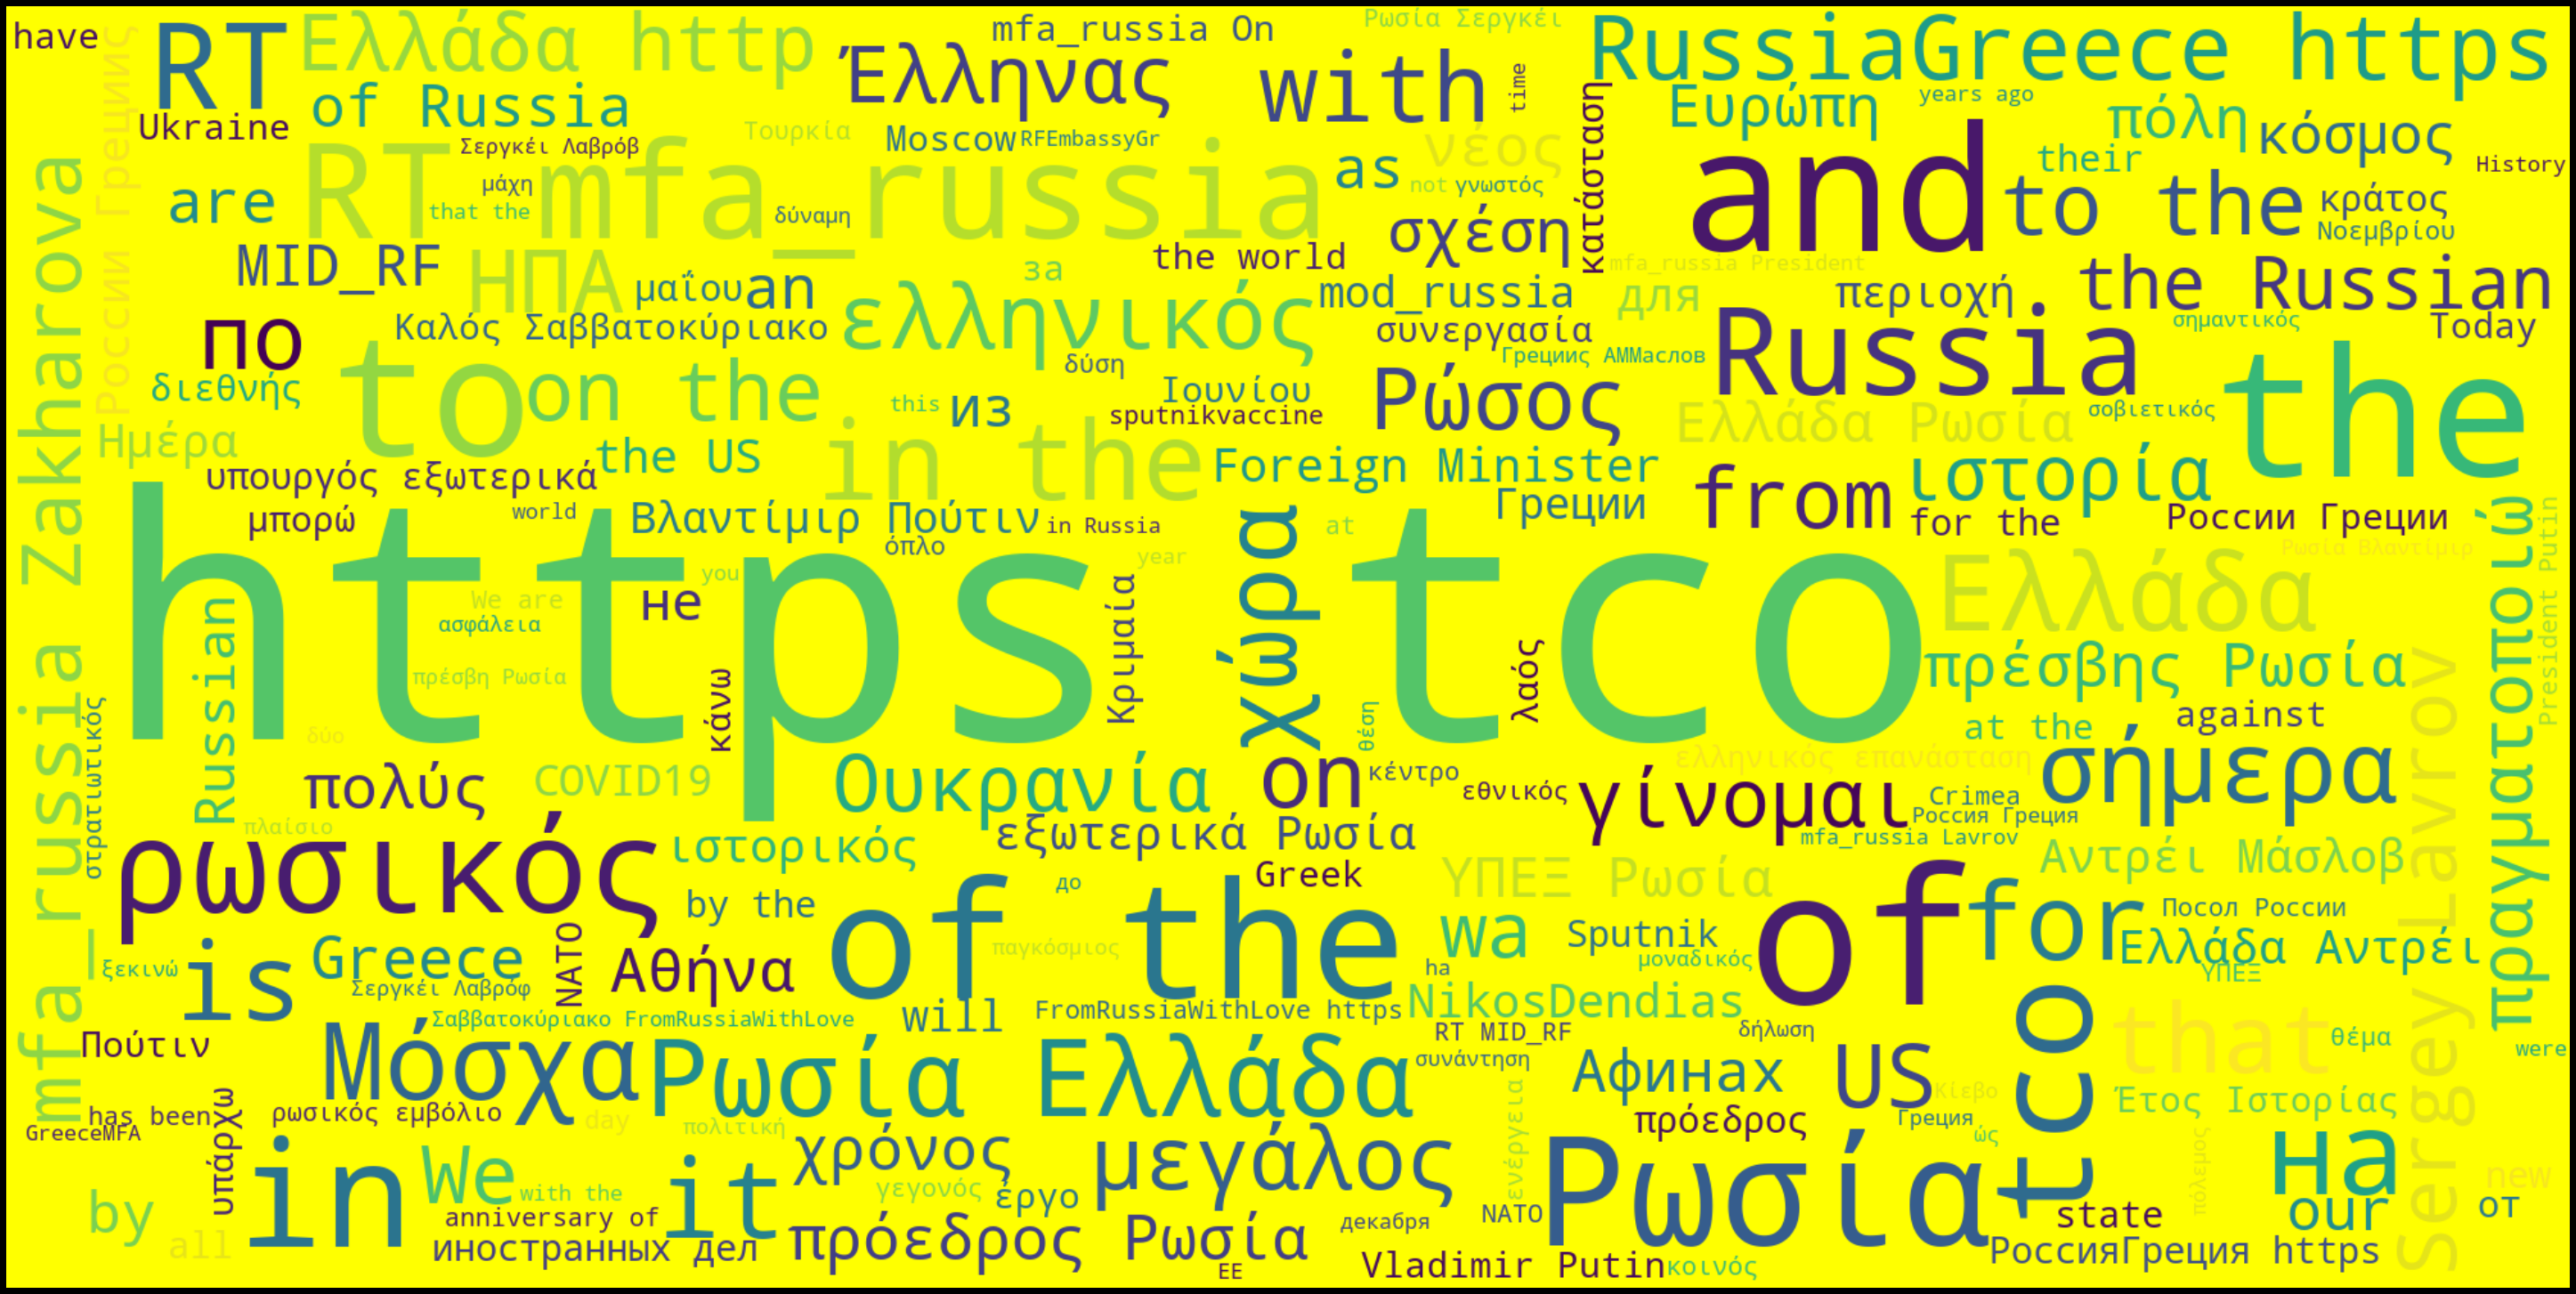

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'yellow'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from collections import Counter
Counter(" ".join(Rus["text"]).split()).most_common(16)

[('της', 1632),
 ('του', 1374),
 ('RT', 1194),
 ('the', 1182),
 ('και', 1033),
 ('of', 879),
 ('την', 774),
 ('в', 768),
 ('το', 676),
 ('για', 606),
 ('στην', 595),
 ('των', 512),
 ('η', 509),
 ('με', 497),
 ('από', 496),
 ('in', 475)]

In [ ]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

αυτής


In [ ]:
Rus['text_no_stopwords'] = Rus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
Rus['text_no_stopwords'] = Rus['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
Rus['clean_text_no_stopwords'] = Rus['text']
#for stopword in nlp.Defaults.stop_words:
Rus['clean_text_no_stopwords'] = Rus['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
Rus['clean_text_no_stopwords'] = Rus['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
Rus['clean_text_no_stopwords'] = Rus['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
Rus['clean_text_no_stopwords'] = Rus['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
Rus['clean_text_no_stopwords'] = Rus['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
Rus['clean_text_no_stopwords'] = Rus['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
Rus['clean_text_no_stopwords'] = Rus['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [ ]:
freq = Counter(" ".join(Rus["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('RT', 1195),
 ('the', 1182),
 ('of', 879),
 ('в', 768),
 ('in', 475),
 ('🔗', 471),
 ('to', 469),
 ('Ρωσίας', 405),
 ('@mfa_russia', 403),
 ('💬', 365),
 ('и', 353),
 ('Η', 331),
 ('🇷🇺', 324),
 ('and', 283),
 ('Ο', 275),
 ('a', 262)]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128279 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128172 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127479 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127482 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128279 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128172 missing from current font.
  font.

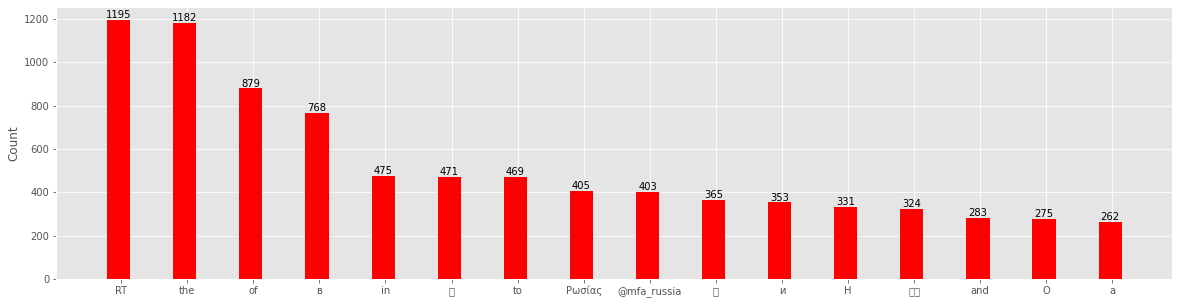

In [ ]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

#Ukr df

In [ ]:
Ukr = Ukr_df[['created_at','full_text' ]]
Ukr = Ukr.rename(columns={'created_at': 'date', 'full_text': 'text'} )
Ukr

date  \
0     Tue Jul 05 18:51:17 +0000 2022   
1     Tue Jul 05 08:31:34 +0000 2022   
2     Tue Jul 05 08:31:32 +0000 2022   
3     Tue Jul 05 08:31:30 +0000 2022   
4     Tue Jul 05 08:30:54 +0000 2022   
...                              ...   
2797  Wed Jun 25 06:33:52 +0000 2014   
2798  Wed Jun 18 09:07:21 +0000 2014   
2799  Wed Jun 18 09:06:30 +0000 2014   
2800  Wed Jun 18 08:20:09 +0000 2014   
2801  Thu Jun 05 08:33:42 +0000 2014   

                                                   text  
0     Speech by the President of Ukraine @ZelenskyyU...  
1     RT @Sergii_Shutenko: Ukraine in 🔝 of internati...  
2     RT @DmytroKuleba: Russia’s export-oriented eco...  
3     RT @NikosDendias: I am visiting Lugano to repr...  
4     RT @DmytroKuleba: Ukraine’s First Lady Olena Z...  
...                                                 ...  
2797  RT @PavloKlimkin: Вперше Україна була запрошен...  
2798  RT @MFA_Ukraine: Сьогодні в ООН заслухають доп...  
2799  RT @ADeshchytsia: Talked to FM @WilliamJHague ...  
2800  RT @ADeshchytsia: Приношу соболезнования родны...  
2801  RT @euronews: [HAPPENING NOW] Petro #Poroshenk...  

[2802 rows x 2 columns]

In [ ]:
#Ukr.dtypes

In [ ]:
Ukr['year'] = pd.DatetimeIndex(Ukr['date']).year
Ukr['month'] = pd.DatetimeIndex(Ukr['date']).month
Ukr['day'] = pd.DatetimeIndex(Ukr['date']).day
Ukr

date  \
0     Tue Jul 05 18:51:17 +0000 2022   
1     Tue Jul 05 08:31:34 +0000 2022   
2     Tue Jul 05 08:31:32 +0000 2022   
3     Tue Jul 05 08:31:30 +0000 2022   
4     Tue Jul 05 08:30:54 +0000 2022   
...                              ...   
2797  Wed Jun 25 06:33:52 +0000 2014   
2798  Wed Jun 18 09:07:21 +0000 2014   
2799  Wed Jun 18 09:06:30 +0000 2014   
2800  Wed Jun 18 08:20:09 +0000 2014   
2801  Thu Jun 05 08:33:42 +0000 2014   

                                                   text  year  month  day  
0     Speech by the President of Ukraine @ZelenskyyU...  2022      7    5  
1     RT @Sergii_Shutenko: Ukraine in 🔝 of internati...  2022      7    5  
2     RT @DmytroKuleba: Russia’s export-oriented eco...  2022      7    5  
3     RT @NikosDendias: I am visiting Lugano to repr...  2022      7    5  
4     RT @DmytroKuleba: Ukraine’s First Lady Olena Z...  2022      7    5  
...                                                 ...   ...    ...  ...  
2797  RT @PavloKlimkin: Вперше Україна була запрошен...  2014      6   25  
2798  RT @MFA_Ukraine: Сьогодні в ООН заслухають доп...  2014      6   18  
2799  RT @ADeshchytsia: Talked to FM @WilliamJHague ...  2014      6   18  
2800  RT @ADeshchytsia: Приношу соболезнования родны...  2014      6   18  
2801  RT @euronews: [HAPPENING NOW] Petro #Poroshenk...  2014      6    5  

[2802 rows x 5 columns]

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
Ukr[Ukr['year']==2022]['text']

0       Speech by the President of Ukraine @ZelenskyyU...
1       RT @Sergii_Shutenko: Ukraine in 🔝 of internati...
2       RT @DmytroKuleba: Russia’s export-oriented eco...
3       RT @NikosDendias: I am visiting Lugano to repr...
4       RT @DmytroKuleba: Ukraine’s First Lady Olena Z...
                              ...                        
1066    RT @NATO: A sovereign, independent and stable ...
1067    RT @JosepBorrellF: In good meeting with PM @De...
1068    On January, 6, the Ukrainian people have speci...
1069    RT @DmytroKuleba: I fully share the point @Jos...
1070    RT @DmytroKuleba: No decisions about Ukraine w...
Name: text, Length: 1071, dtype: object

In [ ]:
# Ισως καποτε χρειαστεί να αφαιρέσουμε τους τόνους.....
text = Ukr['text'].str.replace('ά','α').str.replace("έ", "ε").str.replace('ή','η').str.replace('ί','ι').str.replace('ό','ο').str.replace('ύ','υ').str.replace('ώ','ω')

In [ ]:
text = Ukr[Ukr['year']==2022]['text'].str.cat(sep = '.').replace("amp", ' ')
text

'Speech by the President of Ukraine @ZelenskyyUa at the opening of the 26th Annual Economist Government Roundtable\n\nhttps://t.co/FfGEYXeLRp.RT @Sergii_Shutenko: Ukraine in 🔝 of international agenda\n\nPresident @Zelenskyy opened the 26th Annual Economist Government Roundtable toge….RT @DmytroKuleba: Russia’s export-oriented economy relies heavily on maritime transportation provided by foreign fleets. I urge partners: r….RT @NikosDendias: I am visiting Lugano to represent @PrimeministerGR at the Conference organised by the 🇨🇭 Government for the recovery of….RT @DmytroKuleba: Ukraine’s First Lady Olena Zelenska has announced the Second Summit of First Ladies and Gentlemen on July 23rd. Last year….RT @MFA_Ukraine: The #Ukrainian flag is on Snake Island. #Ukraine’s state symbols will be returned to every corner of our country.\n\n#SlavaU….RT @MFA_Ukraine: .@ZelenskyyUa: “Now we must do everything possible so that the aggressor loses not only on the battlefield but also histor….RT @MFA_Uk

In [ ]:
list(STOPWORDS)[0:20]

['hers',
 "isn't",
 'each',
 'what',
 'she',
 "they'd",
 'com',
 'then',
 'himself',
 'our',
 'yourself',
 'doing',
 'and',
 'all',
 'over',
 'having',
 'other',
 'few',
 'is',
 'above']

In [ ]:
nlp = spacy.load('el_core_news_sm')
list(nlp.Defaults.stop_words)[0:20]

['αυτής',
 'εκάστων',
 'ήταν',
 'μπορεί',
 'απέναντι',
 'οσωνδήποτε',
 'γρήγορα',
 'προς',
 'είμαστε',
 'συχνόν',
 'τούτης',
 'άλλος',
 'κάποιας',
 'οσαδήποτε',
 'τούτος',
 'εκείνος',
 'μέλλεται',
 'άλλο',
 'ωστόσο',
 'ταύτη']

In [ ]:
text = Ukr['text'].str.cat(sep = '.').replace('.','').strip()
text = text.replace('amp','').strip()
text = text.replace('rt','').strip()
text = text.replace('\n','').strip()
text = text.replace(':','').strip()
text

'Speech by the President of Ukraine @ZelenskyyUa at the opening of the 26th Annual Economist Government Roundtablehttps//tco/FfGEYXeLRpRT @Sergii_Shutenko Ukraine in 🔝 of international agendaPresident @Zelenskyy opened the 26th Annual Economist Government Roundtable toge…RT @DmytroKuleba Russia’s expo-oriented economy relies heavily on maritime transpoation provided by foreign fleets I urge paners r…RT @NikosDendias I am visiting Lugano to represent @PrimeministerGR at the Conference organised by the 🇨🇭 Government for the recovery of…RT @DmytroKuleba Ukraine’s First Lady Olena Zelenska has announced the Second Summit of First Ladies and Gentlemen on July 23rd Last year…RT @MFA_Ukraine The #Ukrainian flag is on Snake Island #Ukraine’s state symbols will be returned to every corner of our country#SlavaU…RT @MFA_Ukraine @ZelenskyyUa “Now we must do everything possible so that the aggressor loses not only on the battlefield but also histor…RT @MFA_Ukraine #Ukrainian farmers prepare agricul

In [ ]:
from PIL import Image
import numpy as np

In [ ]:
doc = nlp(Ukr['text'][1])

In [ ]:
for token in doc:
    print(token, token.lemma_)

RT RT
@Sergii_Shutenko @Sergii_Shutenko
: :
Ukraine Ukraine
in in
🔝 🔝
of of
international internationalς
agenda agenda


 


President President
@Zelenskyy @Zelenskyy
opened opened
the the
26th 26th
Annual Annual
Economist Economist
Government Government
Roundtable Roundtable
toge toge
… …


In [ ]:
' '.join(token.lemma_ for token in doc)

'RT @Sergii_Shutenko : Ukraine in 🔝 of internationalς agenda \n\n President @Zelenskyy opened the 26th Annual Economist Government Roundtable toge …'

In [ ]:
text

'Speech by the President of Ukraine @ZelenskyyUa at the opening of the 26th Annual Economist Government Roundtablehttps//tco/FfGEYXeLRpRT @Sergii_Shutenko Ukraine in 🔝 of international agendaPresident @Zelenskyy opened the 26th Annual Economist Government Roundtable toge…RT @DmytroKuleba Russia’s expo-oriented economy relies heavily on maritime transpoation provided by foreign fleets I urge paners r…RT @NikosDendias I am visiting Lugano to represent @PrimeministerGR at the Conference organised by the 🇨🇭 Government for the recovery of…RT @DmytroKuleba Ukraine’s First Lady Olena Zelenska has announced the Second Summit of First Ladies and Gentlemen on July 23rd Last year…RT @MFA_Ukraine The #Ukrainian flag is on Snake Island #Ukraine’s state symbols will be returned to every corner of our country#SlavaU…RT @MFA_Ukraine @ZelenskyyUa “Now we must do everything possible so that the aggressor loses not only on the battlefield but also histor…RT @MFA_Ukraine #Ukrainian farmers prepare agricul

In [ ]:
full_doc = nlp(text)
clear_text = ' '.join(token.lemma_ for token in full_doc)
clear_text[200:400]

'nt @Zelenskyy opened the 26th Annual Economist Government Roundtable toge … RT @DmytroKuleba Russia’s expo-oriented economy relies heavily on maritime transpoation provided by foreign fleets I urge pa'

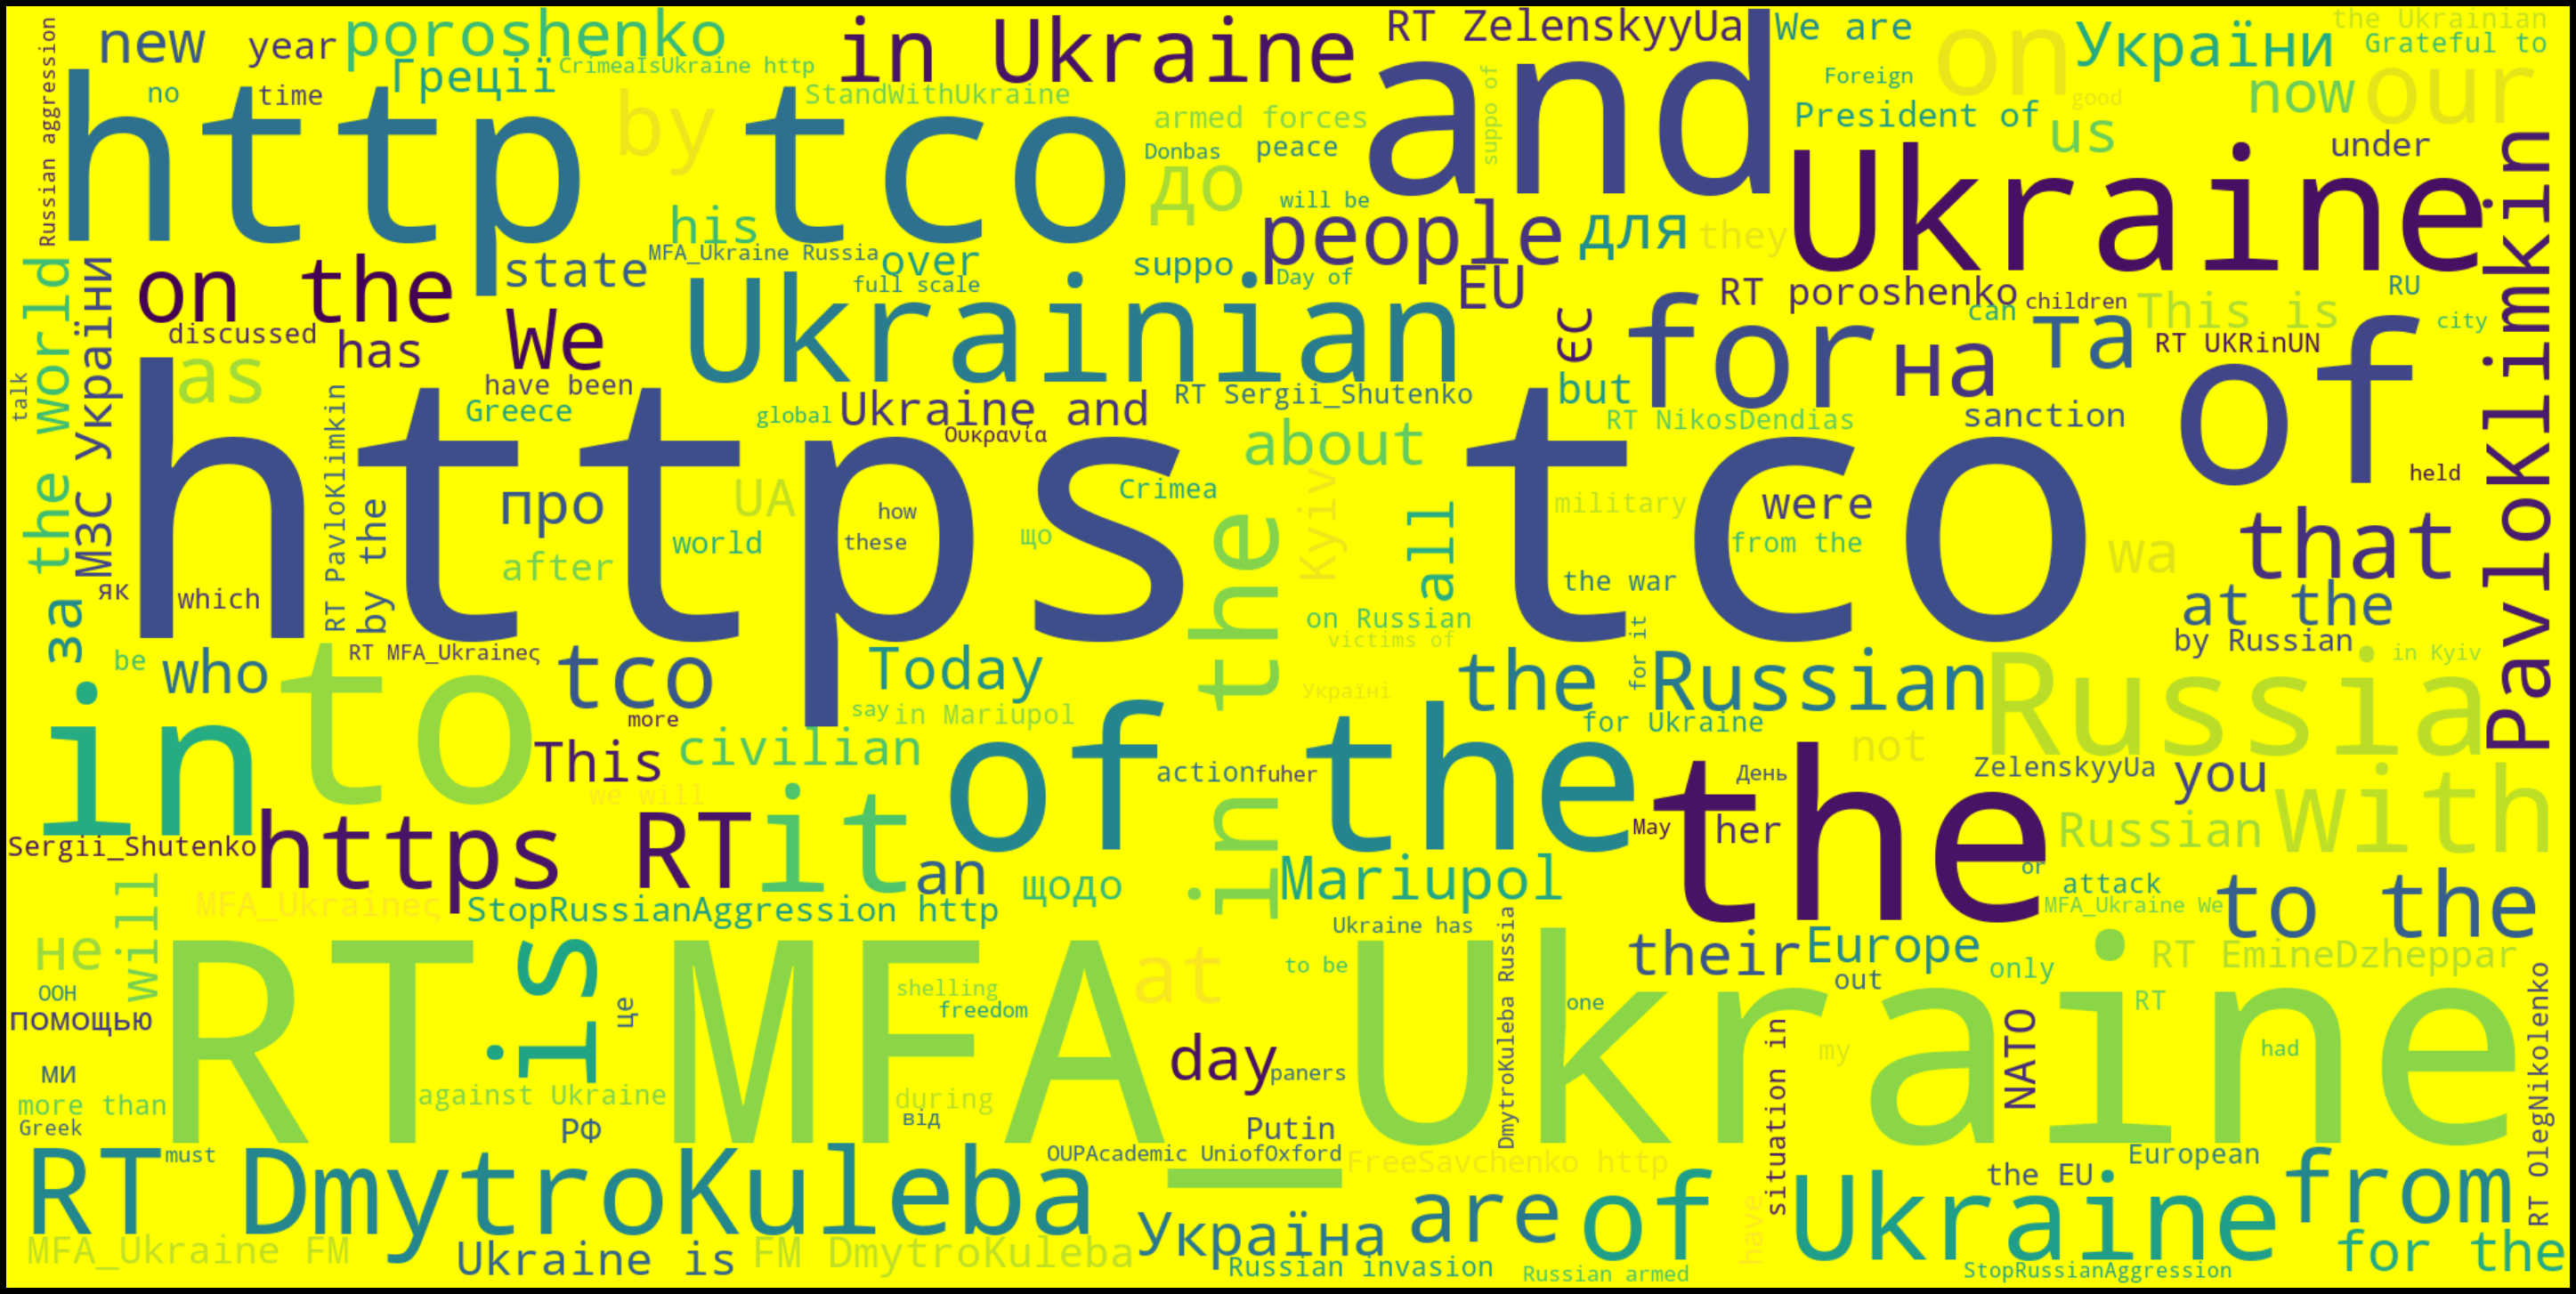

In [ ]:
wordcloud = WordCloud(
    stopwords = nlp.Defaults.stop_words,
    width = 2000,
    height = 1000,
    background_color = 'yellow'
 ).generate(clear_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
from collections import Counter
Counter(" ".join(Ukr["text"]).split()).most_common(16)

[('RT', 1881),
 ('the', 1390),
 ('of', 1171),
 ('@MFA_Ukraine:', 807),
 ('to', 759),
 ('in', 655),
 ('and', 481),
 ('a', 339),
 ('on', 332),
 ('is', 286),
 ('for', 282),
 ('Ukraine', 253),
 ('в', 207),
 ('Russian', 192),
 ('by', 190),
 ('with', 186)]

In [ ]:
for word in nlp.Defaults.stop_words:
  print(word)
  break

αυτής


In [ ]:
Ukr['text_no_stopwords'] = Ukr['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words) and word != ':' and word != '\n' and word != "amp" and word != 'rt' and word != ',']))
Ukr['text_no_stopwords'] = Ukr['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (nlp.Defaults.stop_words)]))
Ukr['clean_text_no_stopwords'] = Ukr['text']
#for stopword in nlp.Defaults.stop_words:
Ukr['clean_text_no_stopwords'] = Ukr['clean_text_no_stopwords'].apply(lambda x: ' '.join([word for word in x.split() if word not in nlp.Defaults.stop_words and word != "ή" and word != "ία" and word != "κι"]))
Ukr['clean_text_no_stopwords'] = Ukr['clean_text_no_stopwords'].apply(lambda x: x.replace("amp", "").strip())
Ukr['clean_text_no_stopwords'] = Ukr['clean_text_no_stopwords'].apply(lambda x: x.replace("rt", "").strip())
Ukr['clean_text_no_stopwords'] = Ukr['clean_text_no_stopwords'].apply(lambda x: x.replace(":", "").strip())
Ukr['clean_text_no_stopwords'] = Ukr['clean_text_no_stopwords'].apply(lambda x: x.replace(",", "").strip())
Ukr['clean_text_no_stopwords'] = Ukr['clean_text_no_stopwords'].apply(lambda x: x.replace("\n", "").strip())
Ukr['clean_text_no_stopwords'] = Ukr['clean_text_no_stopwords'].apply(lambda x: x.replace(".", "").strip())

In [ ]:
freq = Counter(" ".join(Ukr["clean_text_no_stopwords"]).split()).most_common(16)
freq

[('RT', 1881),
 ('the', 1390),
 ('of', 1172),
 ('@MFA_Ukraine', 816),
 ('to', 759),
 ('in', 655),
 ('and', 483),
 ('Ukraine', 359),
 ('a', 340),
 ('on', 335),
 ('is', 288),
 ('for', 283),
 ('#Ukraine', 211),
 ('@DmytroKuleba', 210),
 ('в', 207),
 ('Russian', 193)]

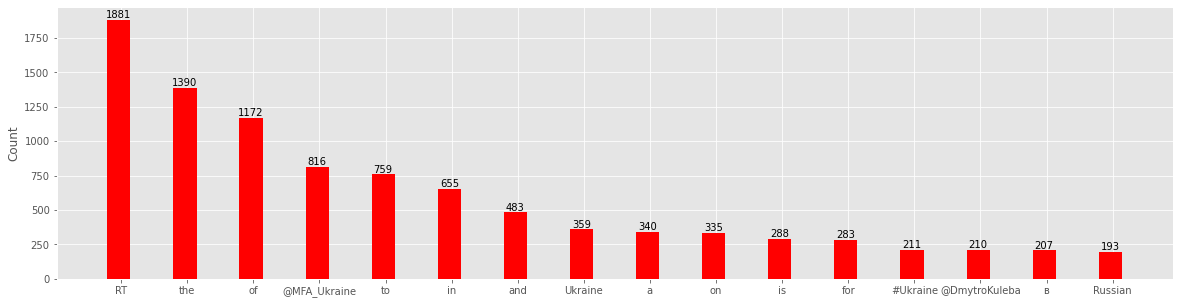

In [ ]:
names, values = zip(*freq)
# names = [x[0] for x in data]  # These two lines are equivalent to the the zip-command.
# values = [x[1] for x in data] # These two lines are equivalent to the the zip-command.

ind = np.arange(len(freq))  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots(figsize=(20,5))
rects1 = ax.bar(ind, values, width, color='r')
# add some text for labels, title and axes ticks
ax.set_ylabel('Count')
ax.set_xticks(ind+width/10.)
ax.set_xticklabels(names)

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)

plt.show()

# Emolex Rus Embassy

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
#emolex_df.tail()

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [ ]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [ ]:
Rus_tweets_df = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/Rus.tsv", sep='\t')

In [ ]:
len(Rus_tweets_df)

3248

In [ ]:
short_tweets_Rus = Rus_tweets_df[['created_at','full_text' ]]
short_tweets_Rus = short_tweets_Rus.rename(columns={'created_at': 'date', 'full_text': 'text'} )
short_tweets_Rus.tail()

date  \
3243  Wed Nov 13 15:26:35 +0000 2019   
3244  Wed Nov 13 15:23:50 +0000 2019   
3245  Wed Nov 13 15:23:49 +0000 2019   
3246  Tue Nov 12 12:18:20 +0000 2019   
3247  Mon Nov 11 10:03:38 +0000 2019   

                                                   text  
3243  1/3 Εκπλήττει η ευκολία με την οποία οι Αμερικ...  
3244  ...και τις προσπάθειες των ΗΠΑ να προωθούν περ...  
3245  Οι τελευταίες απροκάλυπτες παρεμβάσεις Αμερικα...  
3246  RT @Ekatmid: The inaccessible river Shchugor, ...  
3247  Российские дипломаты на финишной прямой Афинск...

In [ ]:
#short_tweets_Rus.dtypes

In [ ]:
short_tweets_Rus['date'] = pd.to_datetime(short_tweets_Rus['date'], format='%a %b %d %H:%M:%S +0000 %Y')

In [ ]:
short_tweets_Rus['year'] = pd.DatetimeIndex(short_tweets_Rus['date']).year
short_tweets_Rus['month'] = pd.DatetimeIndex(short_tweets_Rus['date']).month
short_tweets_Rus['day'] = pd.DatetimeIndex(short_tweets_Rus['date']).day
short_tweets_Rus

date                                               text  \
0    2022-07-05 17:10:42  🔥 Пожарная служба Греции сообщает об ухудшении...   
1    2022-07-05 12:00:05  🎨 #Σανσήμερα το 1832 γεννήθηκε ο Ρώσος ζωγράφο...   
2    2022-07-04 11:52:22  🇷🇺 Σ.#Λαβρόβ:\n\nΗ άρνηση οποιωνδήποτε επαφών ...   
3    2022-07-03 18:30:22  💬 Σεργκέι #Λαβρόβ:\n\n#Ρωσία #Δύση #Ευρώπη #Σι...   
4    2022-07-03 10:40:13  🎨 Στις 2 Ιουλίου του 1839 γεννήθηκε ο #Ρώσος ζ...   
...                  ...                                                ...   
3243 2019-11-13 15:26:35  1/3 Εκπλήττει η ευκολία με την οποία οι Αμερικ...   
3244 2019-11-13 15:23:50  ...και τις προσπάθειες των ΗΠΑ να προωθούν περ...   
3245 2019-11-13 15:23:49  Οι τελευταίες απροκάλυπτες παρεμβάσεις Αμερικα...   
3246 2019-11-12 12:18:20  RT @Ekatmid: The inaccessible river Shchugor, ...   
3247 2019-11-11 10:03:38  Российские дипломаты на финишной прямой Афинск...   

      year  month  day  
0     2022      7    5  
1     2022      7    5  
2     2022      7    4  
3     2022      7    3  
4     2022      7    3  
...    ...    ...  ...  
3243  2019     11   13  
3244  2019     11   13  
3245  2019     11   13  
3246  2019     11   12  
3247  2019     11   11  

[3248 rows x 5 columns]

In [ ]:
#short_tweets_Rus.dtypes

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
short_tweets_Rus['text'] = short_tweets_Rus['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
#short_tweets_Rus.head()

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets_Rus['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(3248, 13161)

In [ ]:
#emolex_df.head()

In [ ]:
#emolex_df[emolex_df.Anger == 1].tail()

In [ ]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']


In [ ]:
#short_tweets_Rus.head(3)

In [ ]:
short_tweets_Rus['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets_Rus['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets_Rus['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets_Rus['disgust'] = wordcount_df[disgust_words].sum(axis=1)


short_tweets_Rus['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets_Rus['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets_Rus['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets_Rus['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets_Rus['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets_Rus['fear'] = wordcount_df[fear_words].sum(axis=1)


In [ ]:
short_tweets_Rus

date                                               text  \
0    2022-07-05 17:10:42  🔥 Пожарная служба Греции сообщает об ухудшении...   
1    2022-07-05 12:00:05  🎨 #Σανσήμερα το 1832 γεννήθηκε ο Ρώσος ζωγράφο...   
2    2022-07-04 11:52:22  🇷🇺 Σ.#Λαβρόβ:\n\nΗ άρνηση οποιωνδήποτε επαφών ...   
3    2022-07-03 18:30:22  💬 Σεργκέι #Λαβρόβ:\n\n#Ρωσία #Δύση #Ευρώπη #Σι...   
4    2022-07-03 10:40:13  🎨 Στις 2 Ιουλίου του 1839 γεννήθηκε ο #Ρώσος ζ...   
...                  ...                                                ...   
3243 2019-11-13 15:26:35  1/3 Εκπλήττει η ευκολία με την οποία οι Αμερικ...   
3244 2019-11-13 15:23:50  ...και τις προσπάθειες των ΗΠΑ να προωθούν περ...   
3245 2019-11-13 15:23:49  Οι τελευταίες απροκάλυπτες παρεμβάσεις Αμερικα...   
3246 2019-11-12 12:18:20  RT @Ekatmid: The inaccessible river Shchugor, ...   
3247 2019-11-11 10:03:38  Российские дипломаты на финишной прямой Афинск...   

      year  month  day  anger  positivity  joy  disgust  surprise  trust  \
0     2022      7    5      0           0    0        0         0      0   
1     2022      7    5      1           3    2        1         2      2   
2     2022      7    4      0           0    0        1         0      0   
3     2022      7    3      0           0    0        0         0      0   
4     2022      7    3      0           2    2        0         0      1   
...    ...    ...  ...    ...         ...  ...      ...       ...    ...   
3243  2019     11   13      0           1    0        1         0      0   
3244  2019     11   13      0           0    0        0         0      1   
3245  2019     11   13      0           2    0        0         0      2   
3246  2019     11   12      0           0    0        0         0      0   
3247  2019     11   11      0           0    0        0         0      0   

      anticipation  sadness  negative  fear  
0                0        0         0     0  
1                2        1         1     2  
2                0        0         1     0  
3                0        0         0     0  
4                2        0         0     0  
...            ...      ...       ...   ...  
3243             0        0         1     0  
3244             0        0         1     0  
3245             0        0         0     0  
3246             0        0         0     0  
3247             0        0         0     0  

[3248 rows x 15 columns]

In [ ]:
max = 0
happiest_tweet = ""
for i in range(0,len(short_tweets_Rus)):
  #print(short_tweets_Rus.iloc[i]['positivity'])
  if short_tweets_Rus.iloc[i]['positivity'] > max:
    happiest_tweet = short_tweets_Rus.iloc[i]['text']
    max = short_tweets_Rus.iloc[i]['positivity']


happiest_tweet

'Ο Πρόεδρος της Ρωσίας Βλαντίμιρ #Πούτιν ευχήθηκε σε όσους γιορτάζουν τα Χριστούγεννα στις 7 Ιανουαρίου υγεία, επιτυχία, ευημερία και εκπλήρωση των επιθυμιών.\nΟ Ρώσος Πρόεδρος παρευρέθηκε τα Χριστούγεννα στην εκκλησία του Αγίου Νικολάου στην περιοχή του Νόβγκοροντ #Ρωσία.  '

In [ ]:
max = 0
negative_tweet = ""
for i in range(0,len(short_tweets_Rus)):
  #print(short_tweets_Rus.iloc[i]['positivity'])
  if short_tweets_Rus.iloc[i]['negative'] > max:
    negative_tweet = short_tweets_Rus.iloc[i]['text']
    max = short_tweets_Rus.iloc[i]['negative']


negative_tweet

'💬 Ο Υπουργός Εξωτερικών της Ρωσίας Σεργκέι Λαβρόφ:\n❗️Έχουμε συζητήσει με τη Δύση το πρόβλημα της δημοκρατίας. Μόλις τους προτείνουμε να συμφωνήσουμε στο οτι η δημοκρατία πρέπει να θριαμβεύσει και στις διεθνείς σχέσεις, ο ενθουσιασμός τους εξαφανίζεται.\n🔗  '

In [ ]:
max = 0
saddest_tweet = ""
for i in range(0,len(short_tweets_Rus)):
  #print(short_tweets_Rus.iloc[i]['positivity'])
  if short_tweets_Rus.iloc[i]['sadness'] > max:
    saddest_tweet = short_tweets_Rus.iloc[i]['text']
    max = short_tweets_Rus.iloc[i]['sadness']

saddest_tweet

"🔈Ρώσος ΥΠΕΞ Σ.Λαβρόφ:\n💬 Ο Β.Ζελένσκι βασίζεται στην επίλυση της σύγκρουσης μέσω της εμπλοκής του ΝΑΤΟ σε αυτήν, και όχι μέσω συνομιλιών. Απ' ότι φαίνεται επιδιώκει να προκαλέσει σύγκρουση μεταξύ ΝΑΤΟ και Ρωσίας  "

In [ ]:
max = 0
fear_tweet = ""
for i in range(0,len(short_tweets_Rus)):
  #print(short_tweets_Rus.iloc[i]['positivity'])
  if short_tweets_Rus.iloc[i]['fear'] > max:
    fear_tweet = short_tweets_Rus.iloc[i]['text']
    max = short_tweets_Rus.iloc[i]['fear']

fear_tweet

'✈️ Ο εχθρός όπως τον βλέπουν οι Ρώσοι πιλότοι του Beriev-200. Ρίψεις νερού στο μέτωπο της Εύβοιας.\n\nΟ γίγαντας Beriev επιχειρεί ασταμάτητα.\nΌλοι ευχόμαστε ο πόλεμος με τη φωτιά να κερδηθεί το συντομότερο.  '

In [ ]:
max = 0
trust_tweet = ""
for i in range(0,len(short_tweets_Rus)):
  #print(short_tweets_Rus.iloc[i]['positivity'])
  if short_tweets_Rus.iloc[i]['trust'] > max:
    trust_tweet = short_tweets_Rus.iloc[i]['text']
    max = short_tweets_Rus.iloc[i]['trust']

trust_tweet

'#Lavrov🇷🇺\n\n💬 Γιατί κανένας δυτικός δημοσιογράφος δεν κάλυπτε σε τακτική βάση τα γεγονότα στη γραμμή επαφής στο Ντονμπάς, που ελέγχεται από την Ουκρανική κυβέρνηση, όλα αυτά τα οκτώ χρόνια; \n\n🔗  '

In [ ]:
short_tweets_Rus.set_index('date' , inplace=True)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

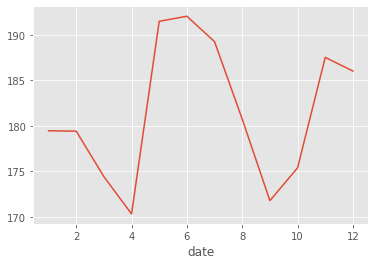

In [ ]:
short_tweets_Rus['text'].str.len().groupby(by=short_tweets_Rus.index.month).mean().plot()

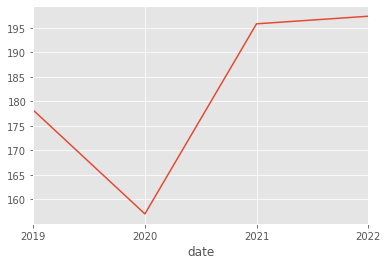

In [ ]:
short_tweets_Rus['text'].str.len().resample('A').mean().plot() 

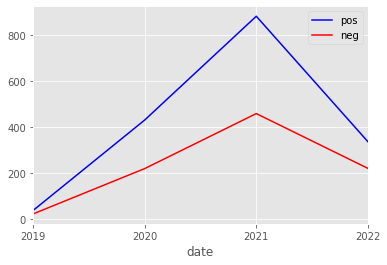

In [ ]:
short_tweets_Rus['positivity'].resample('A').sum().plot(color = 'b',label = 'pos').legend() 
short_tweets_Rus['negative'].resample('A').sum().plot(color = 'r',label = 'neg').legend() 

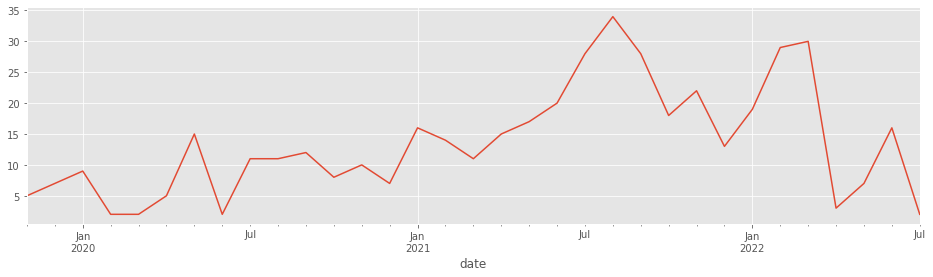

In [ ]:
short_tweets_Rus['anger'].resample('M').sum().plot(figsize=(16,4))

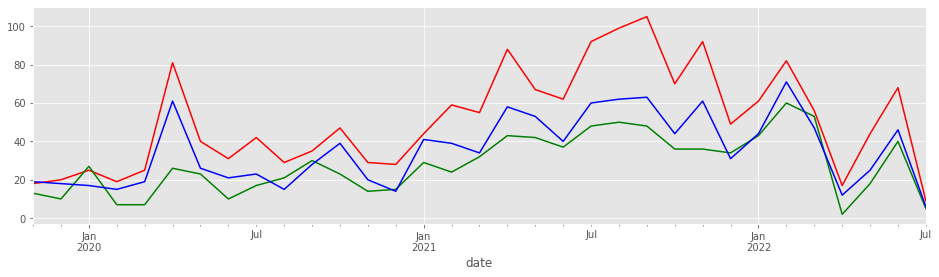

In [ ]:
ax = short_tweets_Rus['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Rus['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets_Rus['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

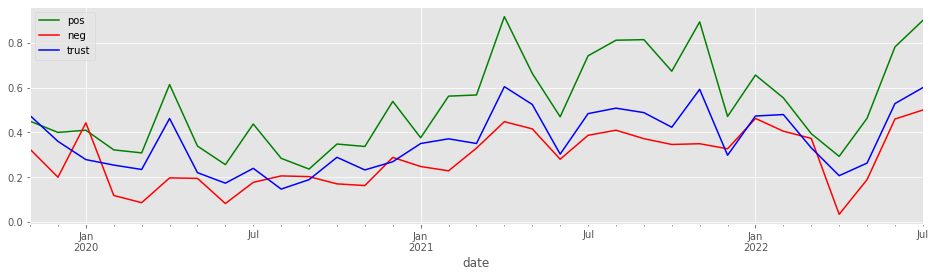

In [ ]:
ax = short_tweets_Rus['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Rus['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Rus['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

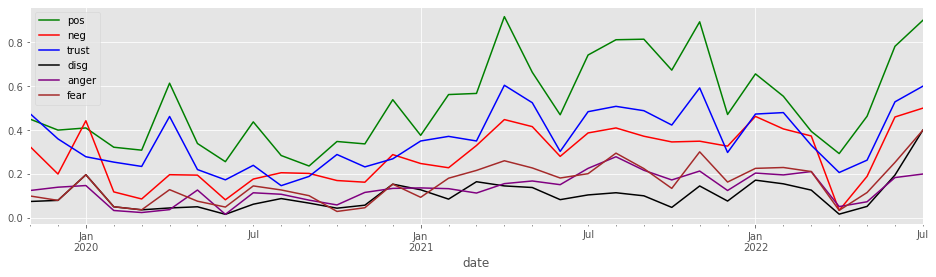

In [ ]:
plt.style.use('ggplot')
ax = short_tweets_Rus['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Rus['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Rus['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

short_tweets_Rus['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'disg',color = 'black').legend() 

short_tweets_Rus['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'anger',color = 'purple').legend() 

short_tweets_Rus['fear'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'fear',color = 'brown').legend()    

Text(0, 0.5, 'Years')

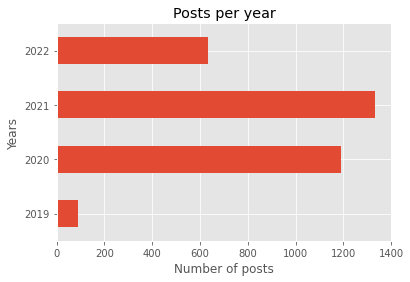

In [ ]:
short_tweets_Rus['text'].groupby(by=short_tweets_Rus.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Month of the year')

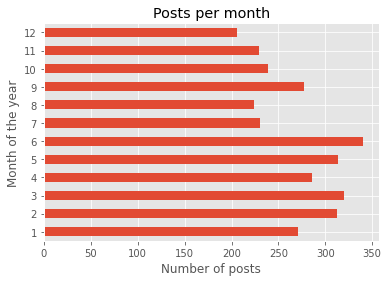

In [ ]:
short_tweets_Rus['text'].groupby(by=short_tweets_Rus.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Month of the year")

Text(0, 0.5, 'Hour of the day')

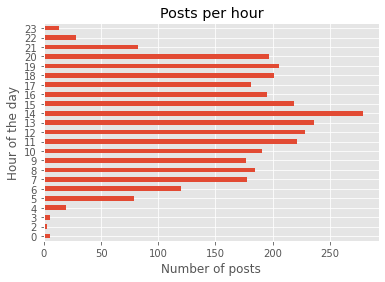

In [ ]:
short_tweets_Rus['text'].groupby(by=short_tweets_Rus.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

# Emolex Ukr Embassy

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)
emolex_df.head()

word  Positive  Negative  Anger  Anticipation  Disgust  Fear  \
0            αφεση       1.0       0.0    0.0           0.0      0.0   0.0   
1  ενορκη βεβαιωση       0.0       0.0    0.0           0.0      0.0   0.0   
2          εχοντας       0.0       0.0    0.0           0.0      0.0   0.0   
3              εχω       0.0       0.0    0.0           0.0      0.0   0.0   
4             οριο       0.0       0.0    0.0           0.0      0.0   0.0   

   Joy  Sadness  Surprise  Trust  
0  0.0      0.0       0.0    0.0  
1  0.0      0.0       0.0    0.0  
2  0.0      0.0       0.0    0.0  
3  0.0      0.0       0.0    0.0  
4  0.0      0.0       0.0    0.0

In [ ]:
#emolex_df.tail()

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [ ]:
#emolex_df.tail()

In [ ]:
import spacy
nlp = spacy.load('el_core_news_sm')

In [ ]:
len(Ukr)

2802

In [ ]:
short_tweets_Ukr = Ukr[['date','text' ]]

short_tweets_Ukr

date  \
0     Tue Jul 05 18:51:17 +0000 2022   
1     Tue Jul 05 08:31:34 +0000 2022   
2     Tue Jul 05 08:31:32 +0000 2022   
3     Tue Jul 05 08:31:30 +0000 2022   
4     Tue Jul 05 08:30:54 +0000 2022   
...                              ...   
2797  Wed Jun 25 06:33:52 +0000 2014   
2798  Wed Jun 18 09:07:21 +0000 2014   
2799  Wed Jun 18 09:06:30 +0000 2014   
2800  Wed Jun 18 08:20:09 +0000 2014   
2801  Thu Jun 05 08:33:42 +0000 2014   

                                                   text  
0     Speech by the President of Ukraine @ZelenskyyU...  
1     RT @Sergii_Shutenko: Ukraine in 🔝 of internati...  
2     RT @DmytroKuleba: Russia’s export-oriented eco...  
3     RT @NikosDendias: I am visiting Lugano to repr...  
4     RT @DmytroKuleba: Ukraine’s First Lady Olena Z...  
...                                                 ...  
2797  RT @PavloKlimkin: Вперше Україна була запрошен...  
2798  RT @MFA_Ukraine: Сьогодні в ООН заслухають доп...  
2799  RT @ADeshchytsia: Talked to FM @WilliamJHague ...  
2800  RT @ADeshchytsia: Приношу соболезнования родны...  
2801  RT @euronews: [HAPPENING NOW] Petro #Poroshenk...  

[2802 rows x 2 columns]

In [ ]:
#short_tweets_Ukr.tail()

In [ ]:
#short_tweets_Ukr.dtypes

In [ ]:
short_tweets_Ukr['date'] = pd.to_datetime(short_tweets_Ukr['date'], format='%a %b %d %H:%M:%S +0000 %Y')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
short_tweets_Ukr['year'] = pd.DatetimeIndex(short_tweets_Ukr['date']).year
short_tweets_Ukr['month'] = pd.DatetimeIndex(short_tweets_Ukr['date']).month
short_tweets_Ukr['day'] = pd.DatetimeIndex(short_tweets_Ukr['date']).day
short_tweets_Ukr

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

date                                               text  \
0    2022-07-05 18:51:17  Speech by the President of Ukraine @ZelenskyyU...   
1    2022-07-05 08:31:34  RT @Sergii_Shutenko: Ukraine in 🔝 of internati...   
2    2022-07-05 08:31:32  RT @DmytroKuleba: Russia’s export-oriented eco...   
3    2022-07-05 08:31:30  RT @NikosDendias: I am visiting Lugano to repr...   
4    2022-07-05 08:30:54  RT @DmytroKuleba: Ukraine’s First Lady Olena Z...   
...                  ...                                                ...   
2797 2014-06-25 06:33:52  RT @PavloKlimkin: Вперше Україна була запрошен...   
2798 2014-06-18 09:07:21  RT @MFA_Ukraine: Сьогодні в ООН заслухають доп...   
2799 2014-06-18 09:06:30  RT @ADeshchytsia: Talked to FM @WilliamJHague ...   
2800 2014-06-18 08:20:09  RT @ADeshchytsia: Приношу соболезнования родны...   
2801 2014-06-05 08:33:42  RT @euronews: [HAPPENING NOW] Petro #Poroshenk...   

      year  month  day  
0     2022      7    5  
1     2022      7    5  
2     2022      7    5  
3     2022      7    5  
4     2022      7    5  
...    ...    ...  ...  
2797  2014      6   25  
2798  2014      6   18  
2799  2014      6   18  
2800  2014      6   18  
2801  2014      6    5  

[2802 rows x 5 columns]

In [ ]:
#short_tweets_Ukr.dtypes

In [ ]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [ ]:
short_tweets_Ukr['text'] = short_tweets_Ukr['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
#short_tweets_Ukr.head()

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#CountVectorizer(stop_words='english', binary=True)
# Θέλω να ελέγξω μόνο τις λέξεις που υπάρχουν στο συναισθηματικό λεξικό

#CountVectorizer(analyzer = 'word', 
#              strip_accents = 'unicode', 
#               token_pattern='[Α-Ωα-ωΆ-Ώά-ώ]{2,}', 
#               stop_words= lc_stop_words_df['stop_w'].tolist())


matrix = vec.fit_transform(short_tweets_Ukr['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:1323: UserWarning: Upper case characters found in vocabulary while 'lowercase' is True. These entries will not be matched with any documents
  "Upper case characters found in"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια

αφεση  ενορκη βεβαιωση  εχοντας  εχω  οριο  ορμος  υδρα  αγια τραπεζα  \
0      0                0        0    0     0      0     0             0   
1      0                0        0    0     0      0     0             0   
2      0                0        0    0     0      0     0             0   
3      0                0        0    0     0      0     0             0   
4      0                0        0    0     0      0     0             0   

   αμην  απατσι  ...  κλητηριο ενταλμα  κατειργασμενος  μαγια  κιτρινο  \
0     0       0  ...                 0               0      0        0   
1     0       0  ...                 0               0      0        0   
2     0       0  ...                 0               0      0        0   
3     0       0  ...                 0               0      0        0   
4     0       0  ...                 0               0      0        0   

   κιτρινιζω  ουρλιασμα  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ  
0          0          0             0         0        0     0  
1          0          0             0         0        0     0  
2          0          0             0         0        0     0  
3          0          0             0         0        0     0  
4          0          0             0         0        0     0  

[5 rows x 13161 columns]

In [ ]:
wordcount_df.shape

(2802, 13161)

In [ ]:
#emolex_df.head()

In [ ]:
#emolex_df[emolex_df.Anger == 1].tail()

In [ ]:
# Φτιάξε μια λίστα με positive words

angry_words = emolex_df[emolex_df.Anger == 1]['word']

positive_words = emolex_df[emolex_df.Positive == 1]['word']


# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']


# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']


# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']


# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']


# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']



# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']


# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']



# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']


In [ ]:
#short_tweets_Ukr.head(3)

In [ ]:
short_tweets_Ukr['anger'] = wordcount_df[angry_words].sum(axis=1)

short_tweets_Ukr['positivity'] = wordcount_df[positive_words].sum(axis=1)


short_tweets_Ukr['joy'] = wordcount_df[joy_words].sum(axis=1)


short_tweets_Ukr['disgust'] = wordcount_df[disgust_words].sum(axis=1)


short_tweets_Ukr['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_tweets_Ukr['trust'] = wordcount_df[trust_words].sum(axis=1)


short_tweets_Ukr['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


short_tweets_Ukr['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_tweets_Ukr['negative'] = wordcount_df[negative_words].sum(axis=1)

short_tweets_Ukr['fear'] = wordcount_df[fear_words].sum(axis=1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
short_tweets_Ukr

date                                               text  \
0    2022-07-05 18:51:17  Speech by the President of Ukraine @ZelenskyyU...   
1    2022-07-05 08:31:34  RT @Sergii_Shutenko: Ukraine in 🔝 of internati...   
2    2022-07-05 08:31:32  RT @DmytroKuleba: Russia’s export-oriented eco...   
3    2022-07-05 08:31:30  RT @NikosDendias: I am visiting Lugano to repr...   
4    2022-07-05 08:30:54  RT @DmytroKuleba: Ukraine’s First Lady Olena Z...   
...                  ...                                                ...   
2797 2014-06-25 06:33:52  RT @PavloKlimkin: Вперше Україна була запрошен...   
2798 2014-06-18 09:07:21  RT @MFA_Ukraine: Сьогодні в ООН заслухають доп...   
2799 2014-06-18 09:06:30  RT @ADeshchytsia: Talked to FM @WilliamJHague ...   
2800 2014-06-18 08:20:09  RT @ADeshchytsia: Приношу соболезнования родны...   
2801 2014-06-05 08:33:42  RT @euronews: [HAPPENING NOW] Petro #Poroshenk...   

      year  month  day  anger  positivity  joy  disgust  surprise  trust  \
0     2022      7    5      0           0    0        0         0      0   
1     2022      7    5      0           0    0        0         0      0   
2     2022      7    5      0           0    0        0         0      0   
3     2022      7    5      0           0    0        0         0      0   
4     2022      7    5      0           0    0        0         0      0   
...    ...    ...  ...    ...         ...  ...      ...       ...    ...   
2797  2014      6   25      0           0    0        0         0      0   
2798  2014      6   18      0           0    0        0         0      0   
2799  2014      6   18      0           0    0        0         0      0   
2800  2014      6   18      0           0    0        0         0      0   
2801  2014      6    5      0           0    0        0         0      0   

      anticipation  sadness  negative  fear  
0                0        0         0     0  
1                0        0         0     0  
2                0        0         0     0  
3                0        0         0     0  
4                0        0         0     0  
...            ...      ...       ...   ...  
2797             0        0         0     0  
2798             0        0         0     0  
2799             0        0         0     0  
2800             0        0         0     0  
2801             0        0         0     0  

[2802 rows x 15 columns]

In [ ]:
max = 0
happiest_tweet = ""
for i in range(0,len(short_tweets_Ukr)):
  #print(short_tweets_Rus.iloc[i]['positivity'])
  if short_tweets_Ukr.iloc[i]['positivity'] > max:
    happiest_tweet = short_tweets_Ukr.iloc[i]['text']
    max = short_tweets_Ukr.iloc[i]['positivity']


happiest_tweet

'Σύμμαχοι από όλο τον κόσμο, σας ευχαριστούμε θερμά για την αλληλεγγύη σας κατά τη διάρκεια των 100 ημερών της ηρωικής αντίστασης της 🇺🇦 ενάντια στον πόλεμο πλήρους κλίμακας της Ρωσίας.\nΓια την πίστη σας στη νίκη της 🇺🇦.\nΓια όλη τη βοήθειά σας.\n\nΕυχαριστούμε! \n\nVideo: banda  '

In [ ]:
max = 0
negative_tweet = ""
for i in range(0,len(short_tweets_Ukr)):
  #print(short_tweets_Ukr.iloc[i]['positivity'])
  if short_tweets_Ukr.iloc[i]['negative'] > max:
    negative_tweet = short_tweets_Ukr.iloc[i]['text']
    max = short_tweets_Ukr.iloc[i]['negative']


negative_tweet

'RT @PresidencyGR: Η 🇷🇺 πρέπει να σεβαστεί την εδαφική ακεραιότητα και κυριαρχία της 🇺🇦 και να αποσύρει έστω και τώρα τον στρατό της. Είμαι…'

In [ ]:
max = 0
saddest_tweet = ""
for i in range(0,len(short_tweets_Ukr)):
  #print(short_tweets_Ukr.iloc[i]['positivity'])
  if short_tweets_Ukr.iloc[i]['sadness'] > max:
    saddest_tweet = short_tweets_Ukr.iloc[i]['text']
    max = short_tweets_Ukr.iloc[i]['sadness']

saddest_tweet

'.@DmytroKuleba : Επιτρέψτε μου να το δηλώσω επίσημα: Η Ουκρανία δεν σχεδιάζει στρατιωτική επίθεση στο Ντονμπάς. Είμαστε αφοσιωμένοι στην αναζήτηση πολιτικών και διπλωματικών λύσεων για την σύγκρουση 2/4'

In [ ]:
max = 0
fear_tweet = ""
for i in range(0,len(short_tweets_Ukr)):
  #print(short_tweets_Ukr.iloc[i]['positivity'])
  if short_tweets_Ukr.iloc[i]['fear'] > max:
    fear_tweet = short_tweets_Ukr.iloc[i]['text']
    max = short_tweets_Ukr.iloc[i]['fear']

fear_tweet

'🇺🇦 στρατός συνεχίζει να μάχεται στην πολιορκημένη #Mariupol, που έχει καταστραφεί από τους σφοδρούς βομβαρδισμούς 🇷🇺.  Η κατάσταση στο Azovstal είναι απελπιστική.  '

In [ ]:
max = 0
trust_tweet = ""
for i in range(0,len(short_tweets_Ukr)):
  #print(short_tweets_Ukr.iloc[i]['positivity'])
  if short_tweets_Ukr.iloc[i]['trust'] > max:
    trust_tweet = short_tweets_Ukr.iloc[i]['text']
    max = short_tweets_Ukr.iloc[i]['trust']

trust_tweet

'Εκατοντάδες πολίτες, παιδιά, τραυματίσμενοι Ουκρανοί υπερασπιστές έχουν παγιδευτεί σε καταφύγιο του εργοστασίου.  Δεν έχουν σχεδόν καθόλου τροφή, νερό, απαραίτητα φάρμακα\nΤο #Azovstal βομβαρδίζεται συνεχώς από τη 🇷🇺, παρά τον μεγάλο αριθμό αμάχων που έχουν βρει  εκεί το καταφύγιο'

In [ ]:
short_tweets_Ukr.set_index('date' , inplace=True)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

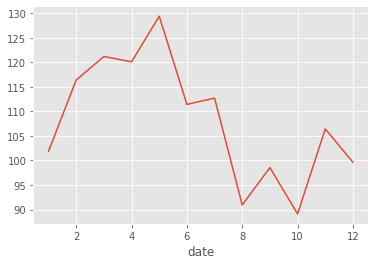

In [ ]:
short_tweets_Ukr['text'].str.len().groupby(by=short_tweets_Ukr.index.month).mean().plot()

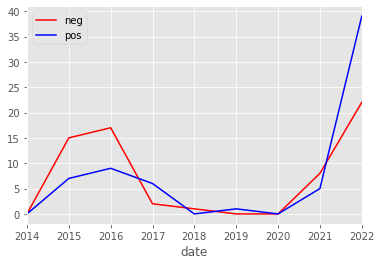

In [ ]:
short_tweets_Ukr['negative'].resample('A').sum().plot(color = 'r',label = 'neg').legend() 
short_tweets_Ukr['positivity'].resample('A').sum().plot(color = 'b',label = 'pos').legend() 

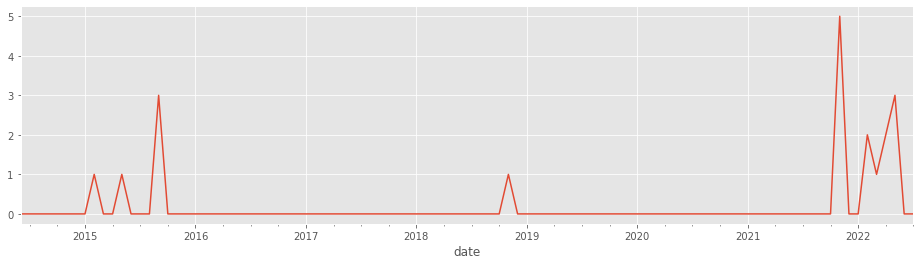

In [ ]:
short_tweets_Ukr['anger'].resample('M').sum().plot(figsize=(16,4))

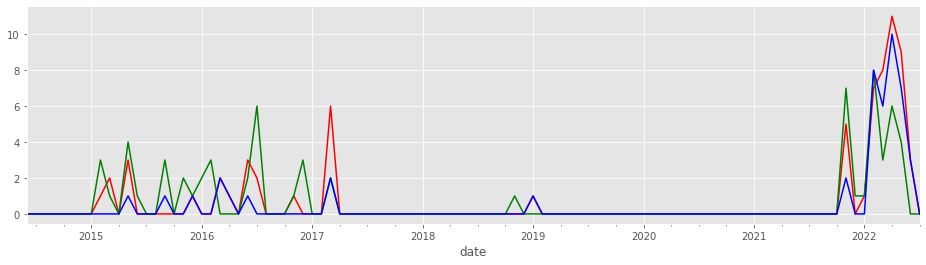

In [ ]:
ax = short_tweets_Ukr['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Ukr['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets_Ukr['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

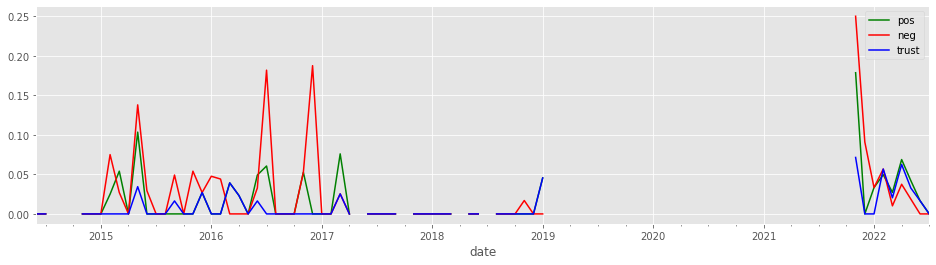

In [ ]:
ax = short_tweets_Ukr['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Ukr['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Ukr['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

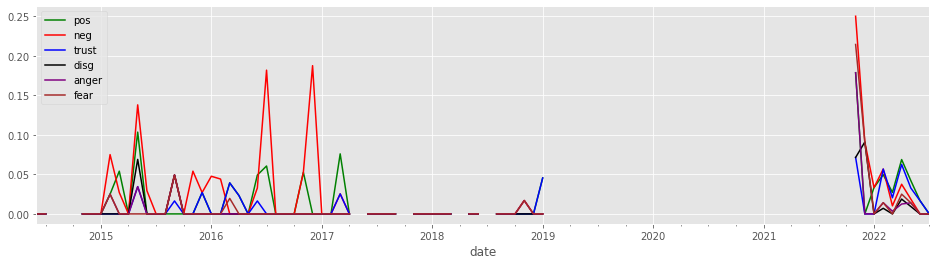

In [ ]:
plt.style.use('ggplot')
ax = short_tweets_Ukr['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos')
short_tweets_Ukr['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg', color = 'r')
short_tweets_Ukr['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust',color = 'blue').legend()

short_tweets_Ukr['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'disg',color = 'black').legend() 

short_tweets_Ukr['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'anger',color = 'purple').legend() 

short_tweets_Ukr['fear'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'fear',color = 'brown').legend()    

Text(0, 0.5, 'Years')

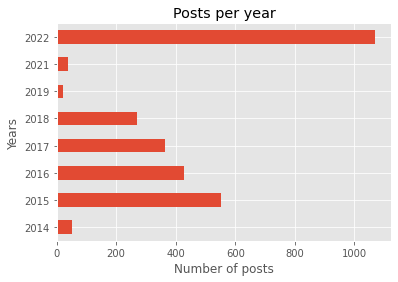

In [ ]:
short_tweets_Ukr['text'].groupby(by=short_tweets_Ukr.index.year).count().plot(kind='barh')
plt.title("Posts per year")
plt.xlabel("Number of posts")
plt.ylabel("Years")

Text(0, 0.5, 'Month of the year')

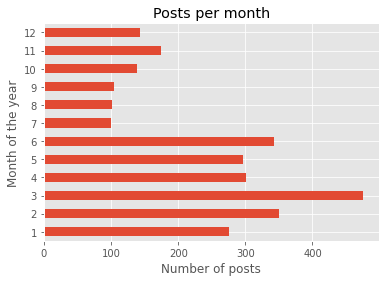

In [ ]:
short_tweets_Ukr['text'].groupby(by=short_tweets_Ukr.index.month).count().plot(kind='barh')
plt.title("Posts per month")
plt.xlabel("Number of posts")
plt.ylabel("Month of the year")

Text(0, 0.5, 'Hour of the day')

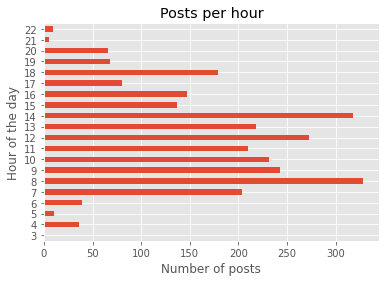

In [ ]:
short_tweets_Ukr['text'].groupby(by=short_tweets_Ukr.index.hour).count().plot(kind='barh')
plt.title("Posts per hour")
plt.xlabel("Number of posts")
plt.ylabel("Hour of the day")

# Ru - Ukr

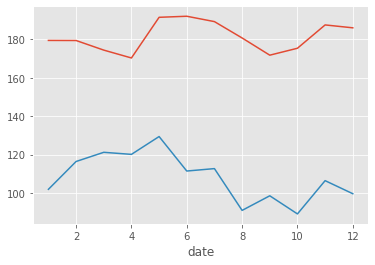

In [ ]:
short_tweets_Rus['text'].str.len().groupby(by=short_tweets_Rus.index.month).mean().plot()
short_tweets_Ukr['text'].str.len().groupby(by=short_tweets_Ukr.index.month).mean().plot()

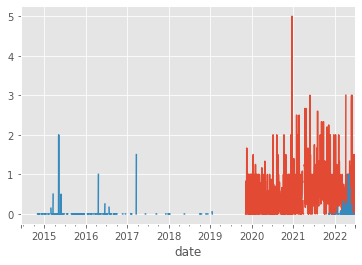

In [ ]:
short_tweets_Rus['positivity'].resample('B').mean().plot() 
short_tweets_Ukr['positivity'].resample('B').mean().plot() 

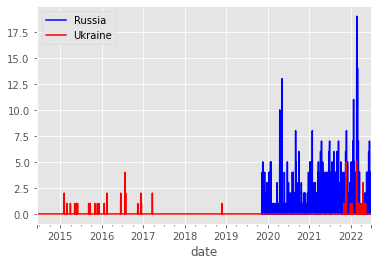

In [ ]:
short_tweets_Rus['negative'].resample('B').sum().plot(color = 'b',label = 'Russia').legend() 
short_tweets_Ukr['negative'].resample('B').sum().plot(color = 'r',label = 'Ukraine').legend() 

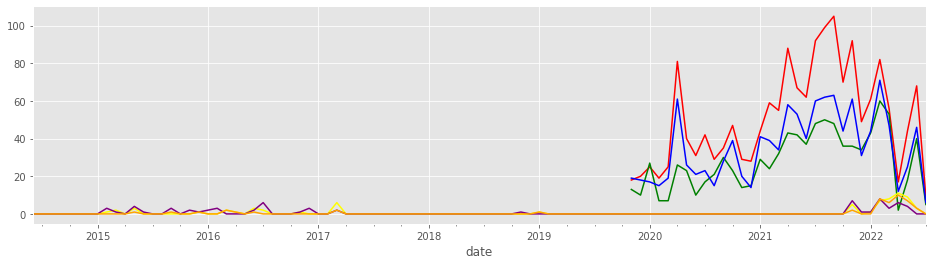

In [ ]:
ax = short_tweets_Rus['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'red')
short_tweets_Rus['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_tweets_Rus['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'blue')
ax = short_tweets_Ukr['positivity'].resample('M').sum().plot(figsize=(16,4), color = 'yellow')
short_tweets_Ukr['negative'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'purple')
short_tweets_Ukr['trust'].resample('M').sum().plot(figsize=(16,4), ax = ax, color = 'orange')

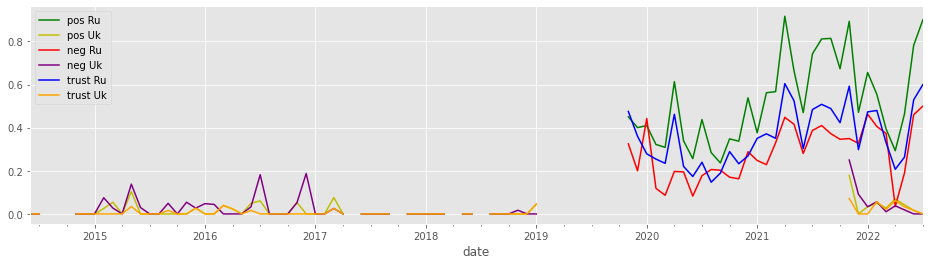

In [ ]:
ax = short_tweets_Rus['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos Ru')
ax = short_tweets_Ukr['positivity'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'y', label='pos Uk')
short_tweets_Rus['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Ru', color = 'r')
short_tweets_Ukr['negative'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Uk', color = 'purple')
short_tweets_Rus['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Ru',color = 'blue').legend()
short_tweets_Ukr['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Uk',color = 'orange').legend()

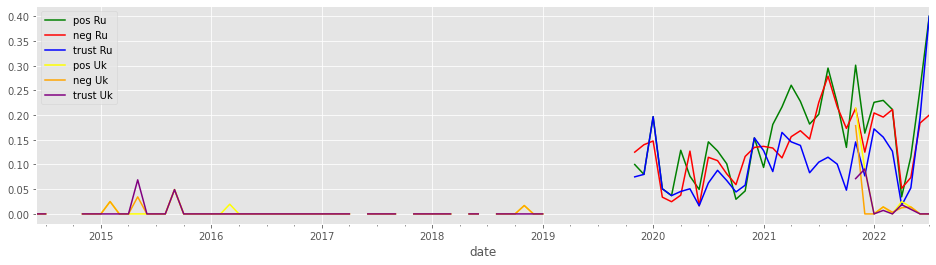

In [ ]:
plt.style.use('ggplot')
ax = short_tweets_Rus['fear'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'g', label='pos Ru')
short_tweets_Rus['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Ru', color = 'r')
short_tweets_Rus['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Ru',color = 'blue').legend()    
short_tweets_Ukr['fear'].resample('M').mean().plot(figsize=(16,4), 
                                                          color = 'yellow', label='pos Uk')
short_tweets_Ukr['anger'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                   label = 'neg Uk', color = 'orange')
short_tweets_Ukr['disgust'].resample('M').mean().plot(figsize=(16,4), ax = ax, 
                                                label = 'trust Uk',color = 'purple').legend()                                                